<a href="https://colab.research.google.com/github/Akanksha-Nakati/Data-Science-Engineering-Methods/blob/main/Akanksha_Nakati_Data_Science_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science Engineering Methods**
# **Assignment 2**

# **H20 AutoML Sleep Health and Lifestyle Analysis**

# **Abstract**
The dataset covers a wide range of professions and age groups, providing insights into how various factors may impact individuals' health and sleep patterns. Notable attributes such as sleep duration, quality of sleep, stress level, and the presence of sleep disorders can shed light on the relationship between lifestyle and well-being.

This dataset can be valuable for conducting research or analysis in the fields of healthcare, sleep science, and lifestyle management. It offers an opportunity to explore the connections between various factors and health outcomes, ultimately contributing to a better understanding of the complex interplay between lifestyle choices and individuals' physical well-being.




## **Dataset**

The Sleep Health and Lifestyle Dataset comprises total of 372 observations.This dataset appears to contain information related to the health and lifestyle of various individuals, including their sleep patterns, physical activity, and health conditions. It could be used for various analyses and insights related to health and well-being.

Dataset Includes:

1.Person ID: A unique identifier for each individual in the dataset.

2.Gender: The gender of the individual, categorized as either "Male" or another value if applicable.

3.Age: The age of the individual, represented in years.

4.Occupation: The occupation or profession of the individual, such as "Software Engineer," "Doctor," or "Sales Representative."

5.Sleep Duration: The average duration of sleep per night in hours.

6.Quality of Sleep: A rating of the quality of sleep on a scale, possibly ranging from 1 to 10, where higher values indicate better sleep quality.

7.Physical Activity Level: A measure of the individual's physical activity, possibly on a scale from low to high, with specific values like "30" and "60" indicating the activity level.

8.Stress Level: The level of stress experienced by the individual, typically measured on a scale, with higher values indicating higher stress levels.

9.BMI Category: The Body Mass Index (BMI) category of the individual, categorized as "Overweight," "Normal," or "Obese" based on their BMI value.

10.Blood Pressure: The individual's blood pressure, usually represented as two values - systolic and diastolic, e.g., "126/83."

11.Heart Rate: The resting heart rate of the individual, typically measured in beats per minute (BPM).

12.Daily Steps: The number of steps taken by the individual on a daily basis as a measure of physical activity.

13.Sleep Disorder: Any sleep disorders or conditions reported by the individual, such as "Sleep Apnea" or "Insomnia." Multiple disorders are separated by commas.



## **Importing required Libraries and H20 Initialization**
AutoML, or Automated Machine Learning, is a comprehensive approach to automating various stages of the machine learning workflow. Its primary aim is to make machine learning more accessible to a broader audience, including individuals with limited data science or machine learning expertise.

H2O is an open-source machine learning platform that provides a user-friendly interface for data scientists and developers to work with machine learning models. Initializing H2O typically involves setting up and configuring the H2O environment to start working with machine learning tasks.

In [ ]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [ ]:

!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [ ]:
#importing all the required libraries
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV


In [ ]:
#setting the memory
min_mem_size=6
run_time=222


In [ ]:

pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)


4


In [ ]:

port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:28718..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpyhydxsq7
  JVM stdout: /tmp/tmpyhydxsq7/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpyhydxsq7/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:28718
Connecting to H2O server at http://127.0.0.1:28718 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_unknownUser_urfguv
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


## **Importing Data**
After Initializing h2o,now importing the data into h2o dataframe

In [ ]:
# Import the processed data from notebook One
url = "https://raw.githubusercontent.com/Akanksha-Nakati/Data-Science-Engineering-Methods/main/Sleep_health_and_lifestyle_dataset.csv"
df = h2o.import_file(path = url)
dff = pd.read_csv('https://raw.githubusercontent.com/Akanksha-Nakati/Data-Science-Engineering-Methods/main/Sleep_health_and_lifestyle_dataset.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
#displaying data
dff.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
#Overview of the dataset
dff.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


According to me, the statistical overview of the Dataset is as follows,

1.Person ID: This column represents individual identifiers and contains values from 1 to 374. It seems to be an identifier for each person in the dataset.

2.Age: The 'Age' column contains age values, with a mean (average) age of approximately 42.18 years. The minimum age is 27 years, and the maximum age is 59 years. The middle 50% of ages (interquartile range) falls between 35.25 years (25th percentile) and 50 years (75th percentile).

3.Sleep Duration: The 'Sleep Duration' column contains values related to how long each person sleeps. The mean sleep duration is approximately 7.13 hours. The minimum sleep duration is 5.8 hours, and the maximum is 8.5 hours. The middle 50% of sleep durations falls between 6.4 hours (25th percentile) and 7.8 hours (75th percentile).

4.Quality of Sleep: The 'Quality of Sleep' column contains values related to the perceived quality of sleep. The mean quality of sleep is approximately 7.31. The minimum quality is 4.0, and the maximum is 9.0. The middle 50% of quality of sleep falls between 6.0 (25th percentile) and 8.0 (75th percentile).

5.Physical Activity Level: This column appears to represent the level of physical activity. The mean physical activity level is approximately 59.17. The minimum is 30, and the maximum is 90. The middle 50% of activity levels falls between 45 (25th percentile) and 75 (75th percentile).

6.Stress Level: The 'Stress Level' column contains values representing stress levels. The mean stress level is approximately 5.39. The minimum stress level is 3.0, and the maximum is 8.0. The middle 50% of stress levels falls between 4.0 (25th percentile) and 7.0 (75th percentile).

7.Heart Rate: This column represents heart rates, with a mean heart rate of approximately 70.17 beats per minute. The minimum heart rate is 65, and the maximum is 86. The interquartile range falls between 68 (25th percentile) and 72 (75th percentile).

8.Daily Steps: The 'Daily Steps' column contains values related to the number of steps taken daily. The mean daily steps are approximately 6816.84, with a minimum of 3000 steps and a maximum of 10,000 steps. The middle 50% of daily steps falls between 5600 (25th percentile) and 8000 (75th percentile).


In [ ]:
#Printing the summary of the dataframe for our Analysis like data types,null values and memory usage
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
#Checking missing values in our data
dff.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

There is no missing values in the dataset


In [ ]:
# Printing Shape of the dataframe
dff.shape

(374, 13)

In [ ]:
df.types

{'Person ID': 'int',
 'Gender': 'enum',
 'Age': 'int',
 'Occupation': 'enum',
 'Sleep Duration': 'real',
 'Quality of Sleep': 'int',
 'Physical Activity Level': 'int',
 'Stress Level': 'int',
 'BMI Category': 'enum',
 'Blood Pressure': 'enum',
 'Heart Rate': 'int',
 'Daily Steps': 'int',
 'Sleep Disorder': 'enum'}

In [ ]:

# Create a 80/20 train/test split
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [ ]:
print(df_train.shape)
print(df_test.shape)

(287, 13)
(87, 13)


In [ ]:

#Display all columns in X
X=df.columns
print(X)


['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']


In [ ]:
#Seperate Dependent variable from Independent variable
y_numeric ='Quality of Sleep'
X.remove(y_numeric)
print(X)

['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']


In [ ]:
dfpd=pd.read_csv("https://raw.githubusercontent.com/Akanksha-Nakati/Data-Science-Engineering-Methods/main/Sleep_health_and_lifestyle_dataset.csv")

AutoML process automatically performs tasks such as data preprocessing, model training, and hyperparameter tuning to find the best-performing machine learning model within the specified time frame.

In [ ]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)


The H2O AutoML uses the specified features (X) to predict the target variable (y_numeric) and to train the model on the training data (df_train).

In [ ]:

#pass the data through H20AutoML
aml.train(x=X,y=y_numeric,training_frame=df_train)


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20231102_220503_model_8


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    56                 56                          39182                  6            15           11.9107       15            88            50.9821

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 1.726426368950596e-05
RMSE: 0.004155028723066299
MAE: 0.003209853421520273
RMSLE: 0.0006018443939190157
Mean Residual Deviance: 1.726426368950596e-05

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.021347264501168556
RMSE: 0.146107030977871
MAE: 0.04007669400771044
RMSLE: 0.020769654890843724
Mean Residual Deviance: 0.021347264501168556

Cross-Validation Metrics Summary: 
                        mean       sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     0.0390867  0.027317   0.0629621     0.0193847     0.0257838     0.0135846     0.0737182
mean_residual_deviance  0.0214159  0.020469   0.0249681     0.00757733    0.0156882     0.00382253    0.0550233
mse                     0.0214159  0.020469   0.0249681     0.00757733    0.0156882     0.00382253    0.0550233
r2                      0.985082   0.0131624  0.978133      0.994341      0.990137      0.997309      0.965488
residual_deviance       0.0214159  0.020469   0.0249681     0.00757733    0.0156882     0.00382253    0.0550233
rmse                    0.133342   0.0674146  0.158013      0.0870478     0.125253      0.0618266     0.23457
rmsle                   0.0183648  0.0109565  0.0214239     0.0103185     0.0163508     0.00812645    0.0356042

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2023-11-02 22:07:27  10.654 sec  0                  1.19263          1.02444         1.42236
    2023-11-02 22:07:27  10.671 sec  5                  0.708836         0.606753        0.502449
    2023-11-02 22:07:27  10.687 sec  10                 0.42258          0.360537        0.178574
    2023-11-02 22:07:27  10.705 sec  15                 0.251158         0.213763        0.0630804
    2023-11-02 22:07:27  10.726 sec  20                 0.15015          0.127276        0.0225449
    2023-11-02 22:07:27  10.754 sec  25                 0.0899872        0.0760514       0.0080977
    2023-11-02 22:07:27  10.778 sec  30                 0.0539648        0.0454527       0.0029122
    2023-11-02 22:07:27  10.803 sec  35                 0.0320993        0.0270622       0.00103037
    2023-11-02 22:07:27  10.826 sec  40                 0.0194021        0.0161906       0.00037644
    2023-11-02 22:07:28  10.855 sec  45                 0.0117957        0.00965726      0.000139139
    2023-11-02 22:07:28  10.887 sec  50                 0.00729711       0.00584615      5.32478e-05
    2023-11-02 22:07:28  10.913 sec  55                 0.00452574       0.00355302      2.04823e-05
    2023-11-02 22:07:28  10.920 sec  56                 0.00415503       0.00320985      1.72643e-05

Variable Importances: 
variable                 relative_importance    scaled_importance    percentage
-----------------------  ---------------------  -------------------  ------------
Sleep Duration           486.378                1                    0.253724
Occupation               407.34                 0.837497             0.212493
Stress Level             301.05  

### Cross-Validation Metrics Summary:
The table presents various metrics on the cross-validation data, which assess the model's performance during cross-validation. It includes metrics such as Mean Absolute Error (mae), Mean Squared Error (mse), R-squared (r2), and others for different cross-validation folds (cv_1_valid, cv_2_valid, etc.).

This output is a summary of the Stacked Ensemble model's performance and metrics on both the training and cross-validation data. It provides insights into how well the model fits the training data and generalizes to new, unseen data through cross-validation. The R-squared values are close to 1, indicating that the model has high predictive accuracy.

In [ ]:
print(aml.leaderboard)

model_id                                                     rmse        mse        mae      rmsle    mean_residual_deviance
GBM_grid_1_AutoML_1_20231102_220503_model_8              0.146107  0.0213473  0.0400767  0.0207697                 0.0213473
StackedEnsemble_BestOfFamily_4_AutoML_1_20231102_220503  0.147274  0.0216896  0.0469468  0.0209083                 0.0216896
GBM_5_AutoML_1_20231102_220503                           0.148087  0.0219298  0.038962   0.0209111                 0.0219298
StackedEnsemble_BestOfFamily_3_AutoML_1_20231102_220503  0.148202  0.0219637  0.0409017  0.0209471                 0.0219637
StackedEnsemble_AllModels_2_AutoML_1_20231102_220503     0.148768  0.0221318  0.0414118  0.0210054                 0.0221318
GBM_grid_1_AutoML_1_20231102_220503_model_13             0.153681  0.0236178  0.0415357  0.0222287                 0.0236178
XGBoost_grid_1_AutoML_1_20231102_220503_model_16         0.155078  0.0240492  0.0563805  0.0218589                 0.0240492


The leaderboard displays a ranked list of models based on a specified performance metric (typically mean squared error, root mean squared error, or another relevant metric).

In [ ]:
#printing the columns
print(dfpd.columns)


Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')


## **Analysing relation between all variables**

VIF is a measure of how much the variance of the estimated regression coefficients increases when your predictors are correlated. High VIF values can indicate multicollinearity, which is a situation in which two or more predictor variables in a regression model are highly correlated.

Now, I will compute VIF values for all variables to assess their interdependence and subsequently eliminate variables that exhibit high VIF values.


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Convert the H2O frame to a pandas data frame
df_pd = df.as_data_frame()

# Select the columns you want to compute VIF for
columns_to_compute_vif = ['Age', 'Quality of Sleep', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

# Compute VIF
vif = pd.DataFrame()
vif["variables"] = columns_to_compute_vif
vif["VIF"] = [variance_inflation_factor(df_pd[columns_to_compute_vif].values, i) for i in range(len(columns_to_compute_vif))]

# Display the VIF values
print(vif)



                 variables         VIF
0                      Age   34.222978
1         Quality of Sleep  364.614642
2           Sleep Duration  409.272726
3  Physical Activity Level   29.579957
4             Stress Level   79.942514
5               Heart Rate  355.341375
6              Daily Steps   72.420513


The VIF values suggest the degree of multicollinearity in the dataset.

"Quality of Sleep," "Sleep Duration," and "Heart Rate" have extremely high VIF values, indicating strong multicollinearity. This suggests that these variables are highly correlated with other predictors in the model.

"Age" and "Physical Activity Level" have moderate VIF values, indicating some level of multicollinearity but not as severe as the previous variables.

"Stress Level" and "Daily Steps" have relatively lower VIF values, indicating less multicollinearity compared to the others.


Ordinary Least Squares (OLS) regression is a statistical technique for analyzing multivariate models, aiming to determine the connection between one or more independent variables and a dependent variable. This method calculates this relationship by minimizing the total squared difference between the actual and predicted values of the dependent variable.


To address multicollinearity, dropping variables with high VIF values from the model.

In [ ]:
import statsmodels.formula.api as smf

# Rename the columns in the DataFrame to have no spaces and special characters
dfpd.columns = dfpd.columns.str.replace(' ', '_').str.replace('[^a-zA-Z0-9_]', '')

# Define the formula for the OLS model
formula = 'Quality_of_Sleep ~ Age + Gender + Occupation + Sleep_Duration + Physical_Activity_Level + Stress_Level + BMI_Category + Blood_Pressure + Heart_Rate + Daily_Steps + Sleep_Disorder'

# Fit the OLS model
results = smf.ols(formula, data=dfpd).fit()

# Display the model summary
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:       Quality_of_Sleep   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     1050.
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        22:17:31   Log-Likelihood:                 333.33
No. Observations:                 374   AIC:                            -574.7
Df Residuals:                     328   BIC:                            -394.2
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

An Ordinary Least Squares (OLS) model that predicts the 'Quality_of_Sleep' variable based on several independent variables. After that, it fits the OLS model using the provided formula and the DataFrame. Finally, it prints the summary of the OLS model's results, which includes statistical information about the model's performance and the relationships between variables.

Now will check VIF and p-values again for the selected independent variables.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Convert the H2O frame to a pandas data frame
df_pd = df.as_data_frame()

# Select the columns you want to compute VIF for
columns_to_compute_vif = ['Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
# Compute VIF
vif = pd.DataFrame()
vif["variables"] = columns_to_compute_vif
vif["VIF"] = [variance_inflation_factor(df_pd[columns_to_compute_vif].values, i) for i in range(len(columns_to_compute_vif))]

# Display the VIF values
print(vif)

                 variables         VIF
0                      Age   30.727828
1           Sleep Duration  166.076046
2  Physical Activity Level   26.620591
3             Stress Level   56.247843
4               Heart Rate  338.740692
5              Daily Steps   58.087495


The variables and their VIF values are as follows,

Age: VIF of approximately 30.73, indicating moderate multicollinearity.

Sleep Duration: VIF of approximately 166.08, indicating high multicollinearity.

Physical Activity Level: VIF of approximately 26.62, indicating moderate multicollinearity.

Stress Level: VIF of approximately 56.25, indicating moderate multicollinearity.

Heart Rate: VIF of approximately 338.74, indicating very high multicollinearity.

Daily Steps: VIF of approximately 58.09, indicating moderate multicollinearity.

High VIF values, such as those for 'Sleep Duration' and 'Heart Rate,' suggest strong multicollinearity and might warrant further investigation or potentially dropping one of the correlated variables from my analysis to improve model stability and interpretability. Lower VIF values, like those for 'Age' and 'Physical Activity Level,' indicate less multicollinearity.

In [ ]:
import statsmodels.formula.api as smf

# Rename the columns in the DataFrame to have no spaces and special characters
dfpd.columns = dfpd.columns.str.replace(' ', '_').str.replace('[^a-zA-Z0-9_]', '')

# Define the formula for the OLS model
formula = 'Quality_of_Sleep ~ Age + Gender + Occupation + Sleep_Duration + Physical_Activity_Level + Stress_Level + BMI_Category + Blood_Pressure + Heart_Rate + Daily_Steps + Sleep_Disorder'

# Fit the OLS model
results = smf.ols(formula, data=dfpd).fit()

# Display the model summary
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:       Quality_of_Sleep   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     1050.
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        22:18:28   Log-Likelihood:                 333.33
No. Observations:                 374   AIC:                            -574.7
Df Residuals:                     328   BIC:                            -394.2
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [ ]:
#Dopping the unecessary features as discussed above
dfpd1=dfpd.drop(['Person_ID'], axis=1)

In [ ]:
dfpd1


,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Blood_Pressure,Heart_Rate,Daily_Steps,Sleep_Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


A correlation matrix is a table that shows the correlation coefficients between many variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two variables have high positive correlation, the value is close to 1. If two variables have a high negative correlation, the value is close to -1. If there's little to no correlation between the variables, the value is close to 0.

In [ ]:
#Calculating correlation matrix for all variables
dfpd1.corr()

,Age,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,Heart_Rate,Daily_Steps
Age,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973
Sleep_Duration,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533
Quality_of_Sleep,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791
Physical_Activity_Level,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723
Stress_Level,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829
Heart_Rate,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309
Daily_Steps,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000


Representing the same matrix in form of heatmap where shades of blue signify inverse relation and shades of red signify direct relation.

Text(0.5, 1.0, 'Variable Correlation')

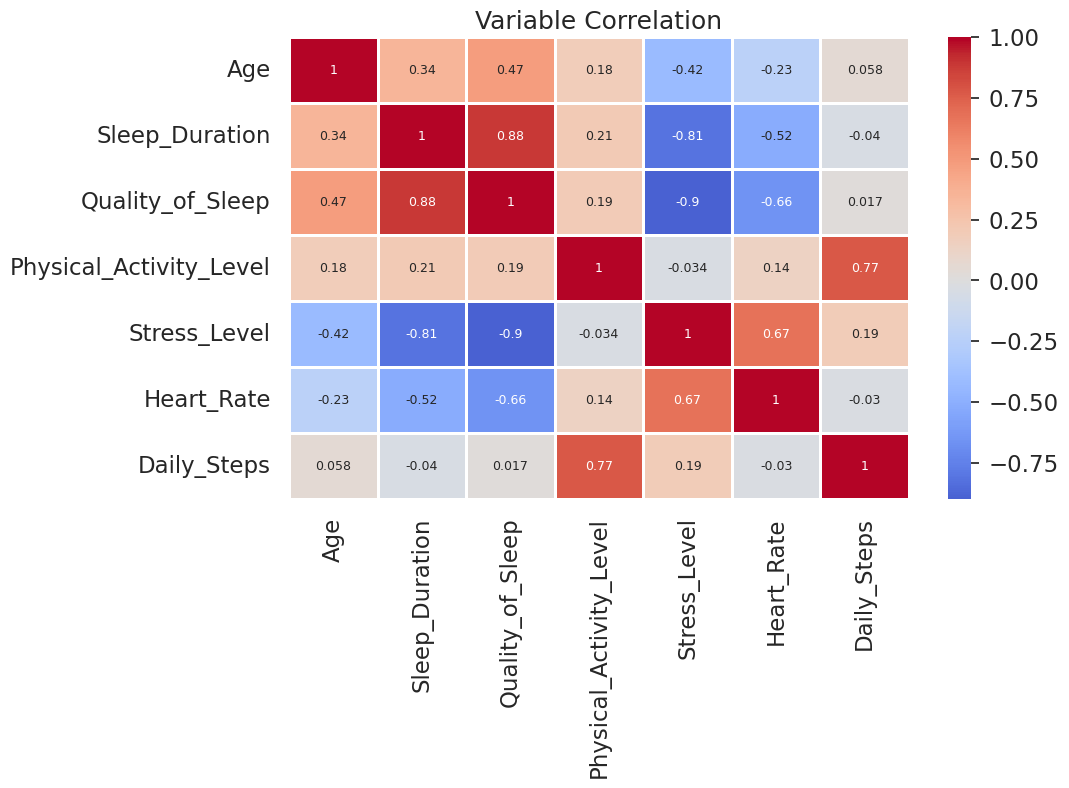

In [ ]:
#Representing Matrix as a plot
from IPython.core.pylabtools import figsize
f,ax=plt.subplots(figsize=(10,6))

sns.heatmap(dfpd1.corr(),center=0, linewidths=0.8,cmap='coolwarm',annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')

According to me, the above correlation plot shows as follows,

1.Strong Positive Correlations:
In the heatmap, there is a noticeable cluster of dark blue squares around "Sleep Duration," "Quality of Sleep," and "Age." This suggests a strong positive correlation between these variables. It makes sense that people who get more sleep tend to report better sleep quality of a particular Age.

2.Negative Correlation:
There is a dark red square between "Stress Level" and "Heart Rate." This indicates a strong negative correlation. It implies that as stress levels increase, heart rates tend to decrease.

3.Weak Correlations:
Many squares are light blue, suggesting weak positive correlations. For instance, "Age" and "Quality of Sleep" have a light blue square. This implies a weak positive correlation, meaning that older individuals tend to have slightly better sleep quality.



4.Implications:
The positive correlation between "Sleep Duration," "Quality of Sleep," and "Daily Steps" suggests that improving sleep duration may lead to better sleep quality and increased physical activity.
The negative correlation between "Stress Level" and "Heart Rate" is surprising and might require further investigation to understand its implications.


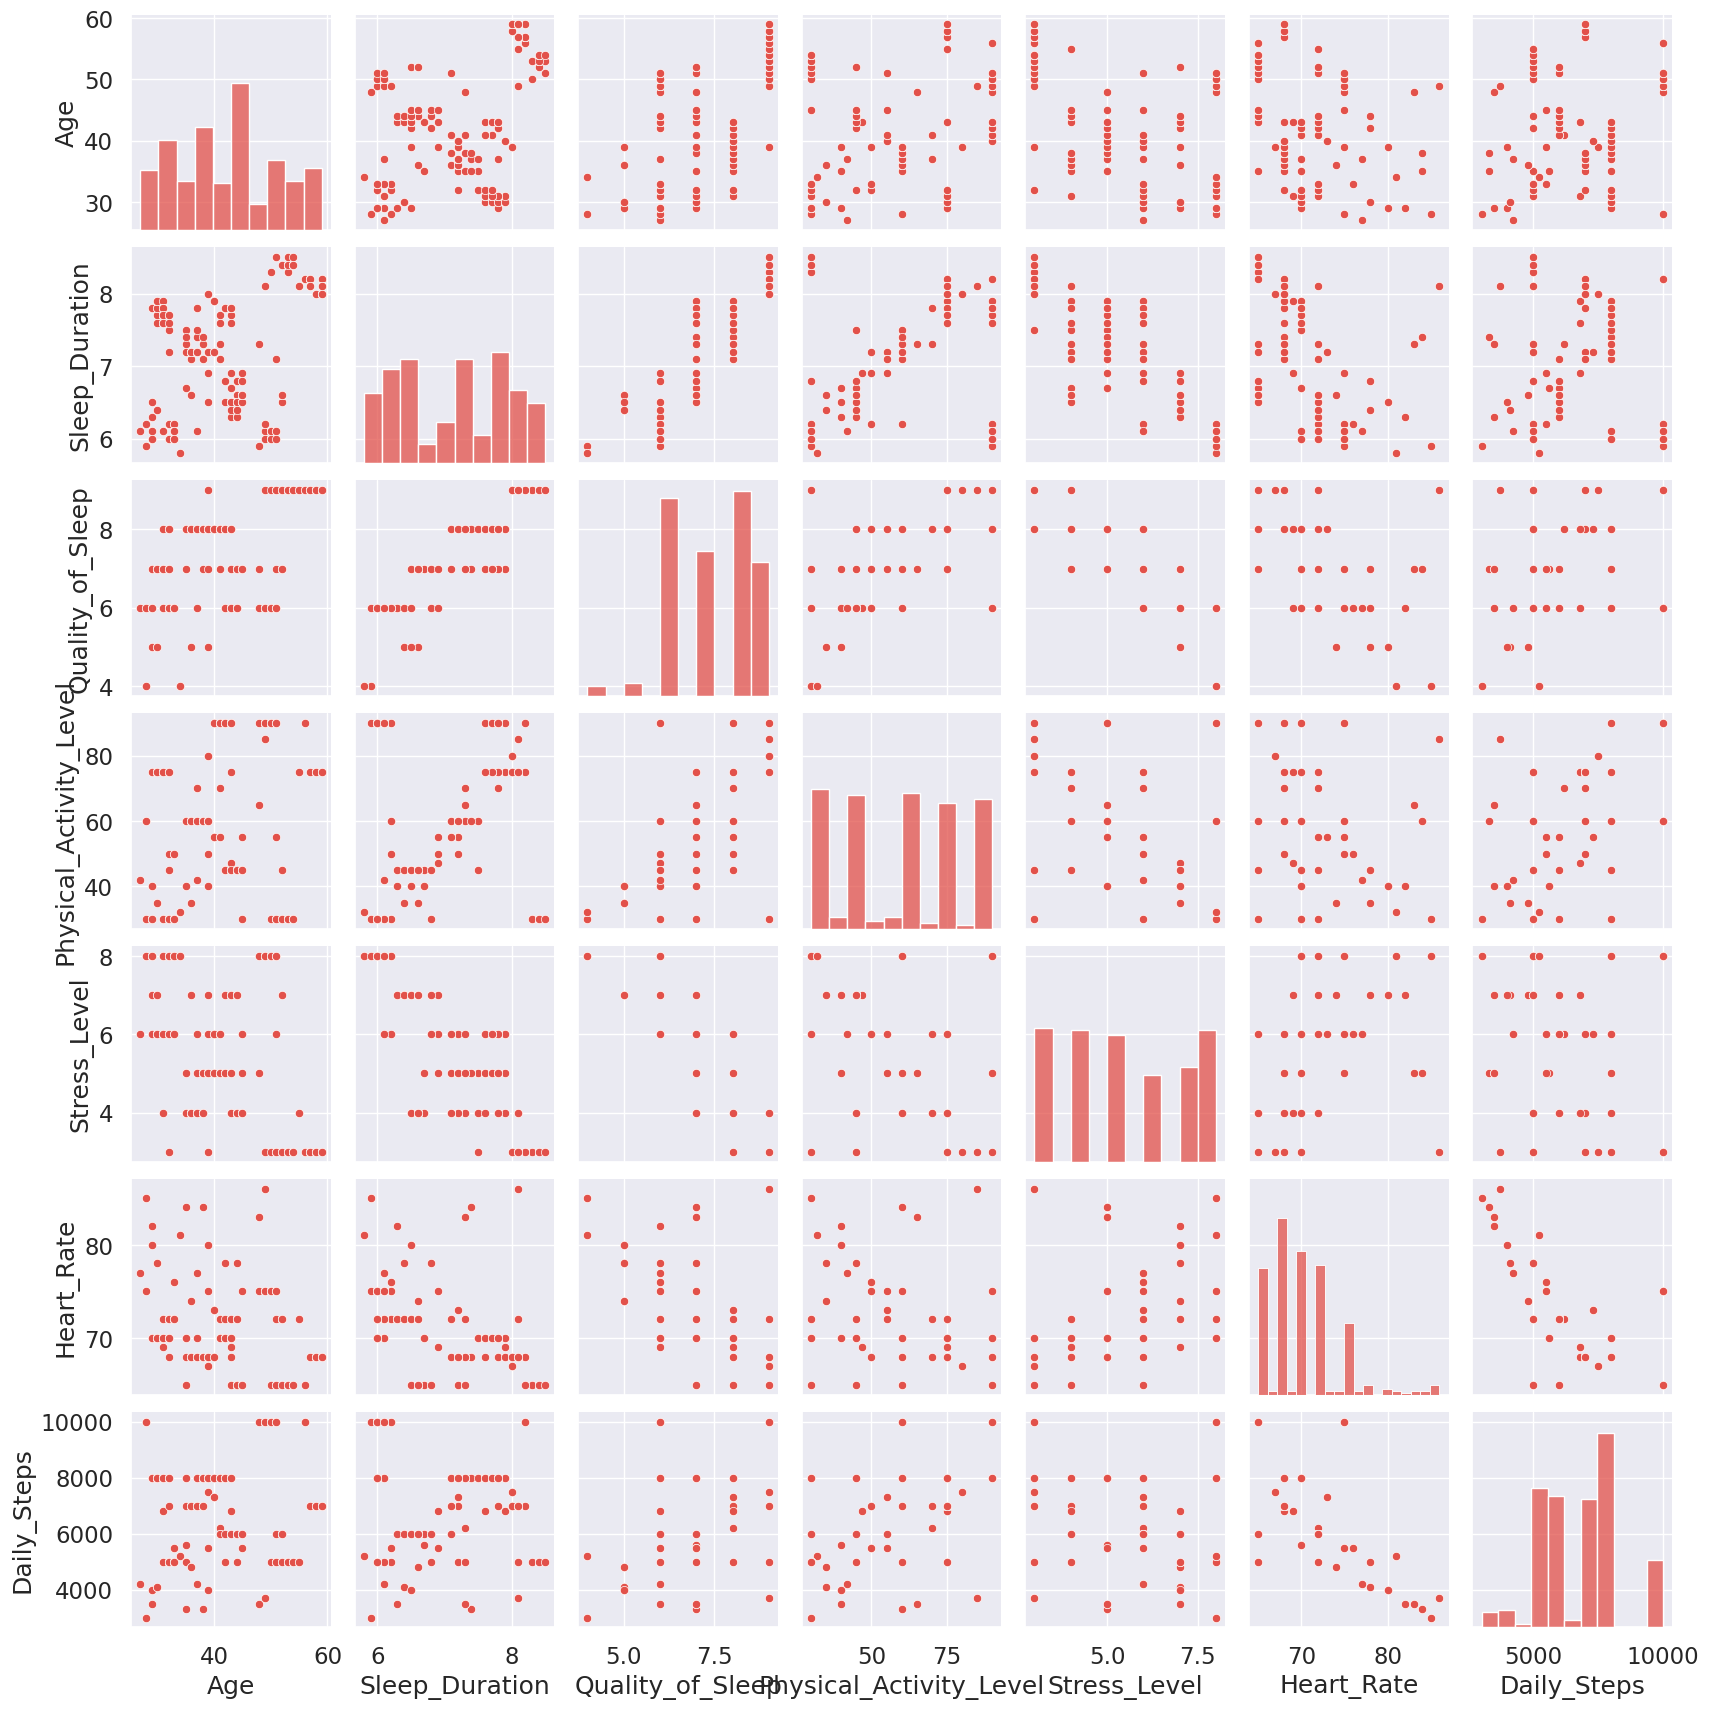

In [ ]:
sns.pairplot(dfpd1)


The diagonal of the pairplot grid displays histograms for each numerical variable in dfpd1. These histograms show the distribution of each variable, allowing you to assess their shapes.
The lower part of the grid contains scatterplots for each pair of numerical variables. These scatterplots visualize the relationships between variables.  The scatterplots helps in assessing the strength of relationships between pairs of variables.

By examining the direction of the points, you can determine whether the correlation is positive or negative. A positive correlation means that as one variable increases, the other tends to increase, and vice versa. A negative correlation implies an inverse relationship.

Scatterplots reveal outliers, which are data points that deviate significantly from the main cluster of points.


In [ ]:
#droping the unrequired variables
df1=df.drop(['Person ID','Age','Gender','Occupation','Heart Rate','BMI Category','Blood Pressure','Daily Steps','Sleep Disorder'], axis=1)


In [ ]:

df1_train, df1_test = df1.split_frame([pct_rows])

In [ ]:
#displaying columns
X1=df1.columns
print(X1)

['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level']


In [ ]:
#Seperate Dependent variable from Independent variable
y1_numeric ='Quality of Sleep'
X1.remove(y1_numeric)
print(X1)


['Sleep Duration', 'Physical Activity Level', 'Stress Level']


In [ ]:

aml1 = H2OAutoML(max_runtime_secs=run_time, seed=1)


By setting a maximum runtime, the duration of the AutoML process is controlled, which can help manage computational resources and ensure that the process does not run indefinitely.

In [ ]:
aml1.train(x=X1,y=y1_numeric,training_frame=df1_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_2_20231102_221855_model_89


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    58                 58                          26331                  7            12           8.7931        14            41            31.3966

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.010863839469977722
RMSE: 0.10422974369141336
MAE: 0.02670563077463687
RMSLE: 0.013452975442578011
Mean Residual Deviance: 0.010863839469977722

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.02484122245953287
RMSE: 0.15761098457763936
MAE: 0.047460379842237416
RMSLE: 0.019950748891910394
Mean Residual Deviance: 0.02484122245953287

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.0461582  0.00897545  0.0387698     0.0573663     0.0444195     0.036846      0.0533891
mean_residual_deviance  0.0256289  0.00992247  0.0226653     0.0405185     0.0211494     0.0143047     0.0295065
mse                     0.0256289  0.00992247  0.0226653     0.0405185     0.0211494     0.0143047     0.0295065
r2                      0.980768   0.0100762   0.982146      0.963846      0.984889      0.990701      0.982257
residual_deviance       0.0256289  0.00992247  0.0226653     0.0405185     0.0211494     0.0143047     0.0295065
rmse                    0.157729   0.0306248   0.15055       0.201292      0.145428      0.119602      0.171774
rmsle                   0.0200441  0.00347047  0.0190418     0.0236837     0.0190092     0.0152699     0.0232161

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2023-11-02 22:21:33  47.811 sec  0                  1.18506          1.03822         1.40436
    2023-11-02 22:21:33  47.818 sec  5                  0.713134         0.621419        0.508559
    2023-11-02 22:21:33  47.824 sec  10                 0.432381         0.378577        0.186953
    2023-11-02 22:21:33  47.830 sec  15                 0.271599         0.235892        0.073766
    2023-11-02 22:21:33  47.838 sec  20                 0.187387         0.154736        0.0351139
    2023-11-02 22:21:33  47.845 sec  25                 0.140504         0.101555        0.0197414
    2023-11-02 22:21:33  47.851 sec  30                 0.121387         0.072617        0.0147347
    2023-11-02 22:21:33  47.857 sec  35                 0.111288         0.0531946       0.012385
    2023-11-02 22:21:33  47.868 sec  40                 0.107145         0.0417891       0.0114801
    2023-11-02 22:21:33  47.875 sec  45                 0.10572          0.0354375       0.0111766
    2023-11-02 22:21:33  47.881 sec  50                 0.105726         0.0309083       0.0111779
    2023-11-02 22:21:33  47.888 sec  55                 0.10464          0.0278604       0.0109496
    2023-11-02 22:21:33  47.891 sec  58                 0.10423          0.0267056       0.0108638

Variable Importances: 
variable                 relative_importance    scaled_importance    percentage
-----------------------  ---------------------  -------------------  ------------
Sleep Duration           918.38                 1                    0.509783
Stress Level             634.583                0.690981             0.35225
Physical Activity Level  248.548       

I have executed a series of commands to determine the time taken for model evaluation and to obtain accuracy using cross-validation. i have then examined the resulting tables, which included crucial values such as root mean square, residual deviance, and timestamps. This approach was employed to prevent the model from overfitting the data. I applied this algorithm throughout our analysis, which included cross-validation, to ensure robustness and accuracy in our conclusions.

In [ ]:
print(aml1.leaderboard)

model_id                                                     rmse        mse        mae      rmsle    mean_residual_deviance
GBM_grid_1_AutoML_2_20231102_221855_model_89             0.157611  0.0248412  0.0474604  0.0199507                 0.0248412
StackedEnsemble_BestOfFamily_4_AutoML_2_20231102_221855  0.157773  0.0248922  0.0534348  0.0200321                 0.0248922
GBM_grid_1_AutoML_2_20231102_221855_model_40             0.166878  0.0278482  0.0531176  0.0217052                 0.0278482
GBM_grid_1_AutoML_2_20231102_221855_model_21             0.167122  0.0279296  0.0563159  0.0214102                 0.0279296
GBM_grid_1_AutoML_2_20231102_221855_model_76             0.168603  0.0284269  0.0540326  0.0219646                 0.0284269
GBM_5_AutoML_2_20231102_221855                           0.169977  0.0288922  0.061367   0.0215262                 0.0288922
StackedEnsemble_BestOfFamily_3_AutoML_2_20231102_221855  0.17135   0.0293609  0.063113   0.0217942                 0.0293609


In [ ]:
#assign index values to all the models generated
model_index=0
glm_index=0
glm_model=''
aml1_leaderboard_df1=aml1.leaderboard.as_data_frame()
models_dict={}
for m in aml1_leaderboard_df1['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break
  model_index=model_index+1

for m in aml1_leaderboard_df1['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break
  glm_index=glm_index+1
models_dict


{'GBM_grid_1_AutoML_2_20231102_221855_model_89': 0,
 'GLM_1_AutoML_2_20231102_221855': 159}

In [ ]:

#print the index value of best model
print(model_index)
best_model1 = h2o.get_model(aml1.leaderboard[model_index,'model_id'])

0


In [ ]:
#determining the best model algorithm
best_model1.algo

'gbm'

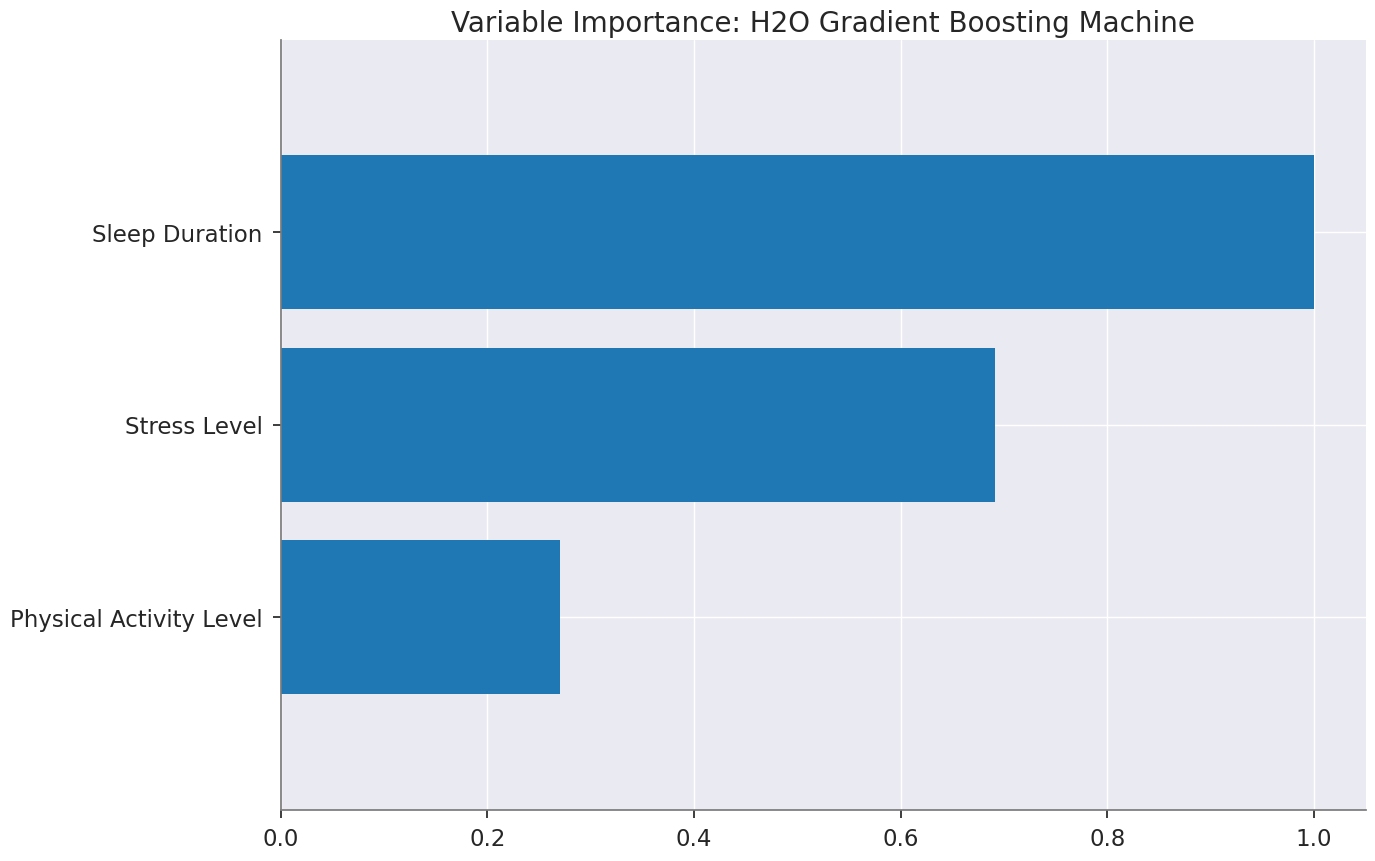

<Figure size 800x550 with 0 Axes>

In [ ]:

#plot variables in order of their importance for quality of sleep prediction
if best_model1.algo in ['gbm','drf','xrt','xgboost']:
    best_model1.varimp_plot()


This gives a variable importance plot for a machine learning model. The variable importance plot is specific to certain algorithms like GBM (Gradient Boosting Machines), DRF (Distributed Random Forest), XRT (Extremely Randomized Trees), and XGBoost. The importance of variables indicates how much each feature contributes to the model's predictions. Variables with higher importance have a more significant impact on the model's performance, and those with lower importance have less influence.

159
glm


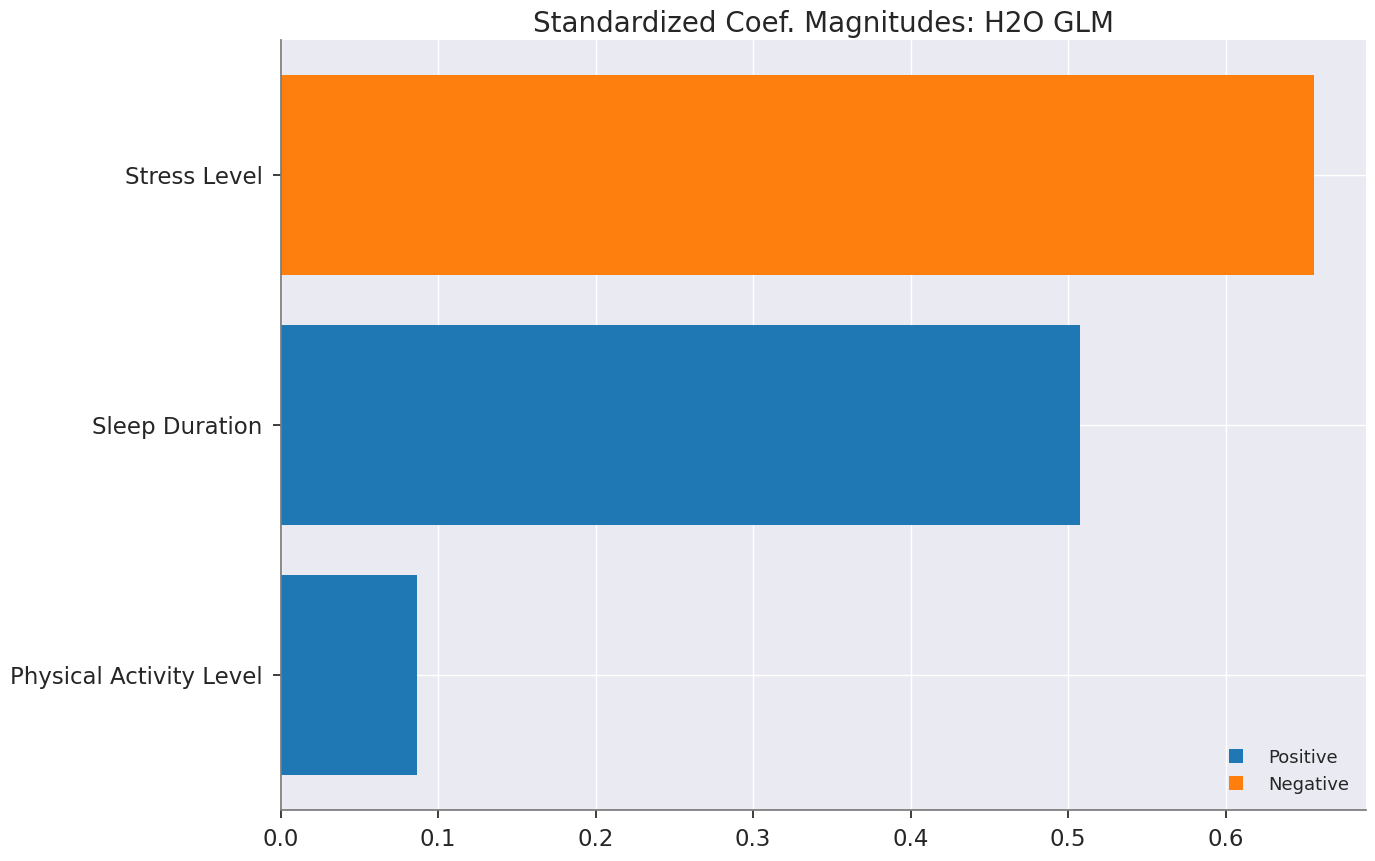

In [ ]:
if glm_index is not 0:
  print(glm_index)
  glm_model1=h2o.get_model(aml1.leaderboard[glm_index,'model_id'])
  print(glm_model1.algo)
  glm_model1.std_coef_plot()

This checks if a GLM model exists in the AutoML leaderboard and, prints its index, displays the algorithm used, and generates a standard coefficient plot to analyze the importance and direction of the features in the GLM model. If glm_index is equal to 0, these actions are skipped, indicating that there may not be a GLM model in the leaderboard.
From the above results, we observe that Stress Level and Sleep Duration are some of the important features.

## **Checking if assumptions violated**

In [ ]:

#Seperating the predictor and target variables
A=dfpd1.drop(['Quality_of_Sleep'],axis=1)
B=dfpd1['Quality_of_Sleep']


In [ ]:
#Splitting the data
A_train,A_test,b_train,b_test=tts(A,B,test_size=0.2,random_state=42)

Here we are checking if the Homoscedasticity (normality of the error distribution) assumption is satisfies. A normal distribution of errors is expected.

In [ ]:
cols1 = ['Age', 'Heart_Rate', 'Daily_Steps','Sleep_Duration','Physical_Activity_Level','Stress_Level']
model1 = sm.OLS(b_train.astype(float), sm.add_constant(A_train[cols1].astype(float))).fit()


In [ ]:
b_pred = model1.predict(sm.add_constant(A_train[cols1]))

In [ ]:

residuals = b_train-b_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -3.370919299918736e-14


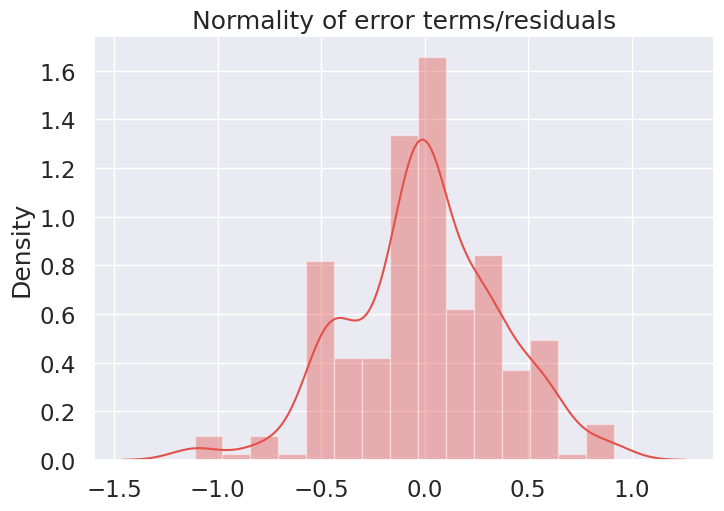

In [ ]:
#regression analysis to check the assumptions of the model and to identify potential problems with the model's predictions.
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

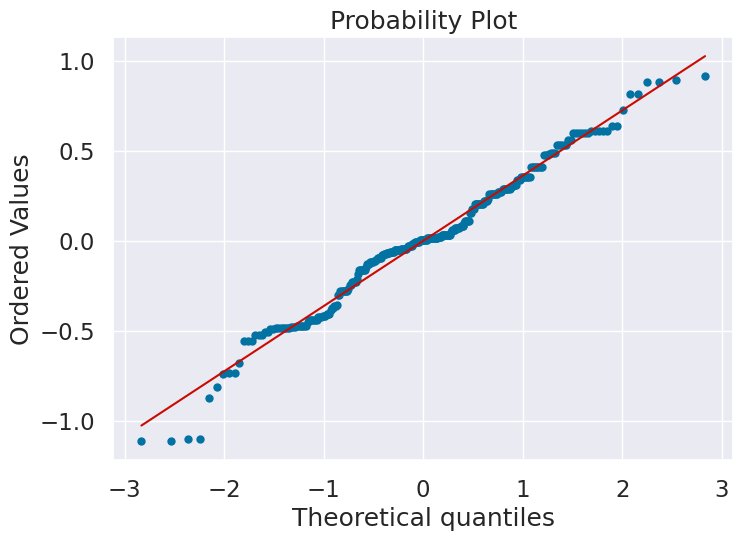

In [ ]:

import pylab
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

A probability plot (Q-Q plot) is used to assess whether a dataset follows a particular theoretical distribution, in this case, a normal distribution. In the plot, the residuals are compared to what they would look like if they followed a perfect normal distribution. The residuals closely follow a straight line, it indicates that they are normally distributed.



<Axes: xlabel='Quality_of_Sleep', ylabel='Count'>

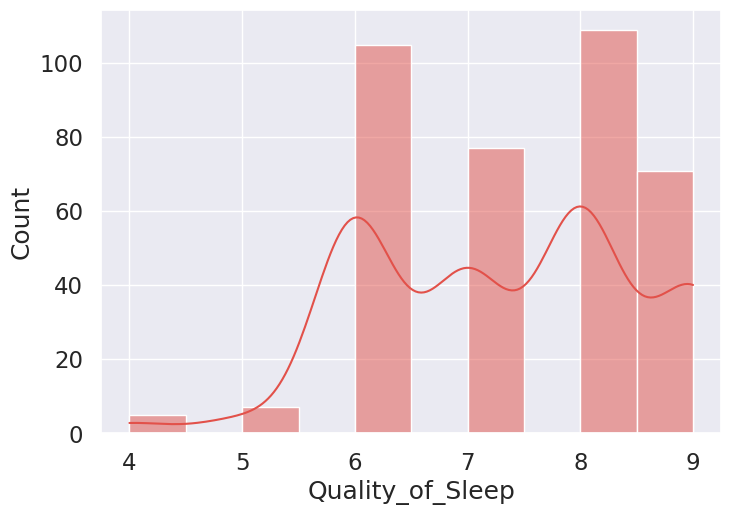

In [ ]:
sns.histplot(dfpd.Quality_of_Sleep, kde = True)


This visualization helps analyze the distribution and density of the quality of sleep values. The histogram displays the frequency of different quality of sleep values, while the KDE provides a smooth curve representing the estimated probability density function.

In an ideal scatterplot, the data points should be spread out randomly without any discernible pattern. When the same data is visualized as a distribution plot (distplot), it should resemble a bell curve. In this case, both the scatterplot and the distplot show the expected outcomes, indicating that these assumptions are met.

## **Ridge Regularization in H20**
Ridge regularization, also known as L2 regularization, is a technique used in machine learning, including within the H2O framework, to prevent overfitting in predictive models. It does so by adding a penalty term to the model's objective function. This penalty term is proportional to the square of the magnitude of the model's coefficients.

In H2O, you can apply Ridge regularization when training models, especially when using linear regression algorithms. By specifying a regularization parameter (often denoted as "lambda" or "alpha" in H2O), you control the strength of the Ridge regularization. A higher lambda value results in stronger regularization, which can reduce the magnitude of the coefficients in the model.

Ridge regularization helps models generalize better to unseen data and avoid fitting noise in the training data. It's a valuable tool when you have a high-dimensional dataset with many features or predictors.

Here, we use H2OGeneralizedLinearEstimator which would enable us to fit a generalized linear model, specified by a response variable, a set of predictors and a description of the error distribution.

In [ ]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
sleep_glm = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = 0, compute_p_values = True)
sleep_glm_regularization = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = .001, alpha = 0)


In [ ]:
#Model details without regularization
sleep_glm.train(x = X1, y = y1_numeric, training_frame = df1_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1698962683742_51


GLM Model: summary
    family    link      regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  None              3                             3                              1                       py_15_sid_9cf5

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.15405410991014035
RMSE: 0.3924972737614114
MAE: 0.30199078869493023
RMSLE: 0.05412138740936277
Mean Residual Deviance: 0.15405410991014035
R^2: 0.8903032256817801
Null degrees of freedom: 308
Residual degrees of freedom: 305
Null deviance: 433.94822006472566
Residual deviance: 47.602719962233365
AIC: 308.9345385746679

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse       training_deviance    training_mae         training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  ------------------  -------------------  -------------------  ------------------
    2023-11-02 22:22:47  0.000 sec   0             433.94822006472566         1.4043631717305038
    2023-11-02 22:22:47  0.010 sec   1                                                            0.3924972737614114  0.15405410991014035  0.30199078869493023  0.8903032256817801

Variable Importances: 
variable                 relative_importance    scaled_importance    percentage
-----------------------  ---------------------  -------------------  ------------
Stress Level             0.658566               1                    0.525773
Sleep Duration           0.50694                0.769764             0.404721
Physical Activity Level  0.0870605              0.132197             0.0695057

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

From the above results, the accuracy and other related variables were not same for both the cases. When dataset was regularized and when dataset was not regularized. This tells that for this specific model regularization does help.

## **Data Report**

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_BestOfFamily_2_AutoML_2_20231102_221855,0.202241,0.0409014,0.096487,0.0302981,0.0409014,111,0.095769,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_2_20231102_221855,0.202241,0.0409014,0.096487,0.0302981,0.0409014,112,0.060241,StackedEnsemble
GBM_grid_1_AutoML_2_20231102_221855_model_123,0.202263,0.0409101,0.0897358,0.0301744,0.0409101,67,0.025336,GBM
DRF_1_AutoML_2_20231102_221855,0.20801,0.0432683,0.0947619,0.0314401,0.0432683,36,0.015272,DRF
GBM_grid_1_AutoML_2_20231102_221855_model_40,0.209446,0.0438677,0.0773563,0.0313514,0.0438677,70,0.041516,GBM
GBM_grid_1_AutoML_2_20231102_221855_model_8,0.213308,0.0455005,0.0790586,0.0314479,0.0455005,77,0.025883,GBM
GBM_grid_1_AutoML_2_20231102_221855_model_93,0.22591,0.0510355,0.0828979,0.0333262,0.0510355,144,0.027212,GBM
GBM_grid_1_AutoML_2_20231102_221855_model_66,0.230868,0.0533,0.0892701,0.0342874,0.0533,88,0.025904,GBM
GBM_grid_1_AutoML_2_20231102_221855_model_76,0.233942,0.054729,0.08313,0.0339995,0.054729,76,0.102531,GBM
XGBoost_grid_1_AutoML_2_20231102_221855_model_13,0.235359,0.0553938,0.105874,0.0337079,0.0553938,420,0.007167,XGBoost


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

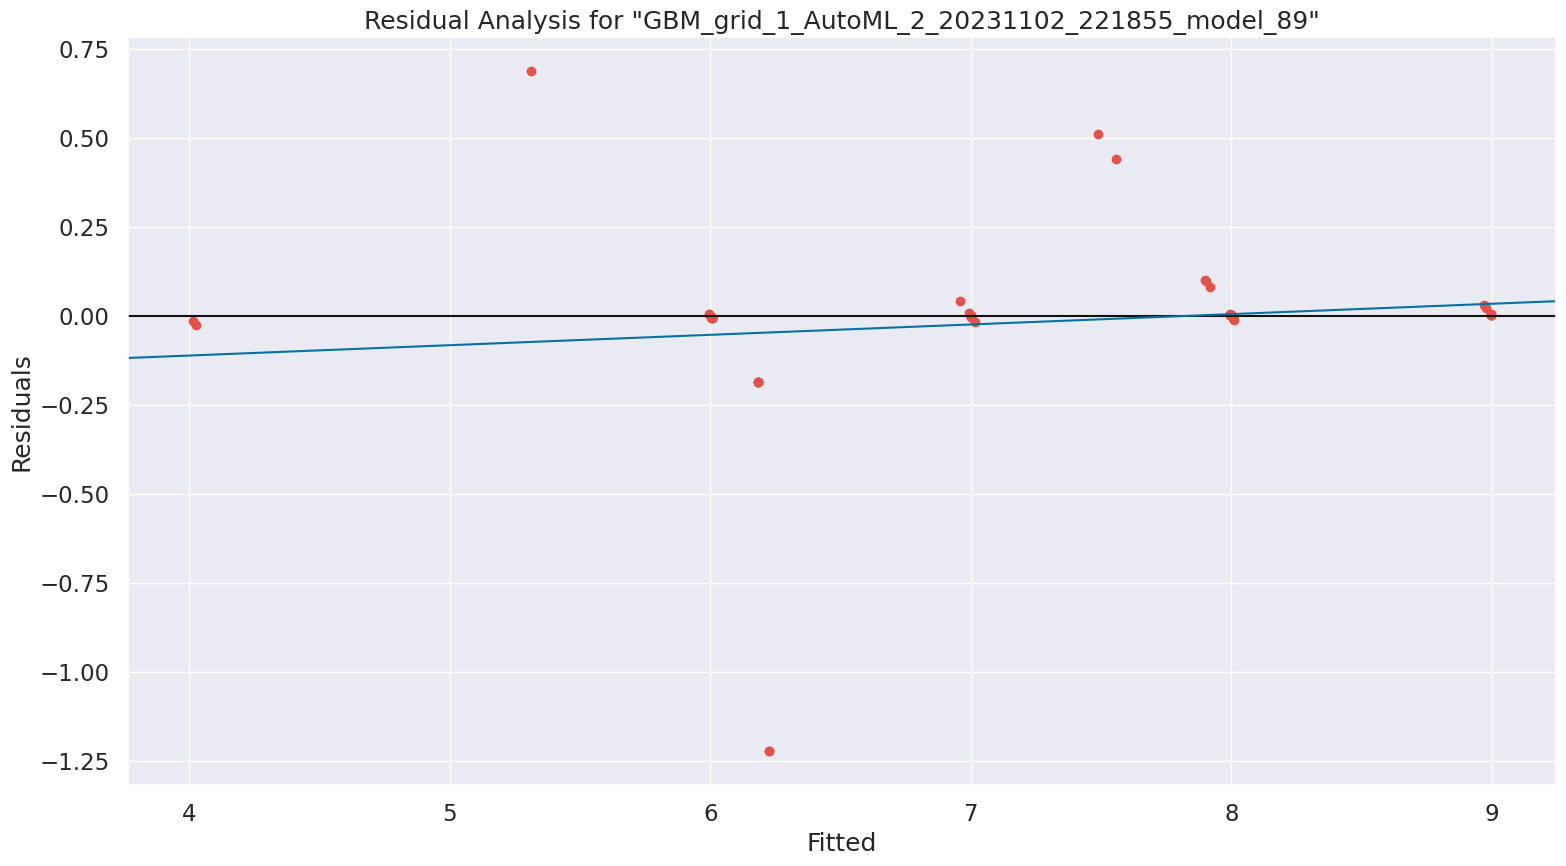

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

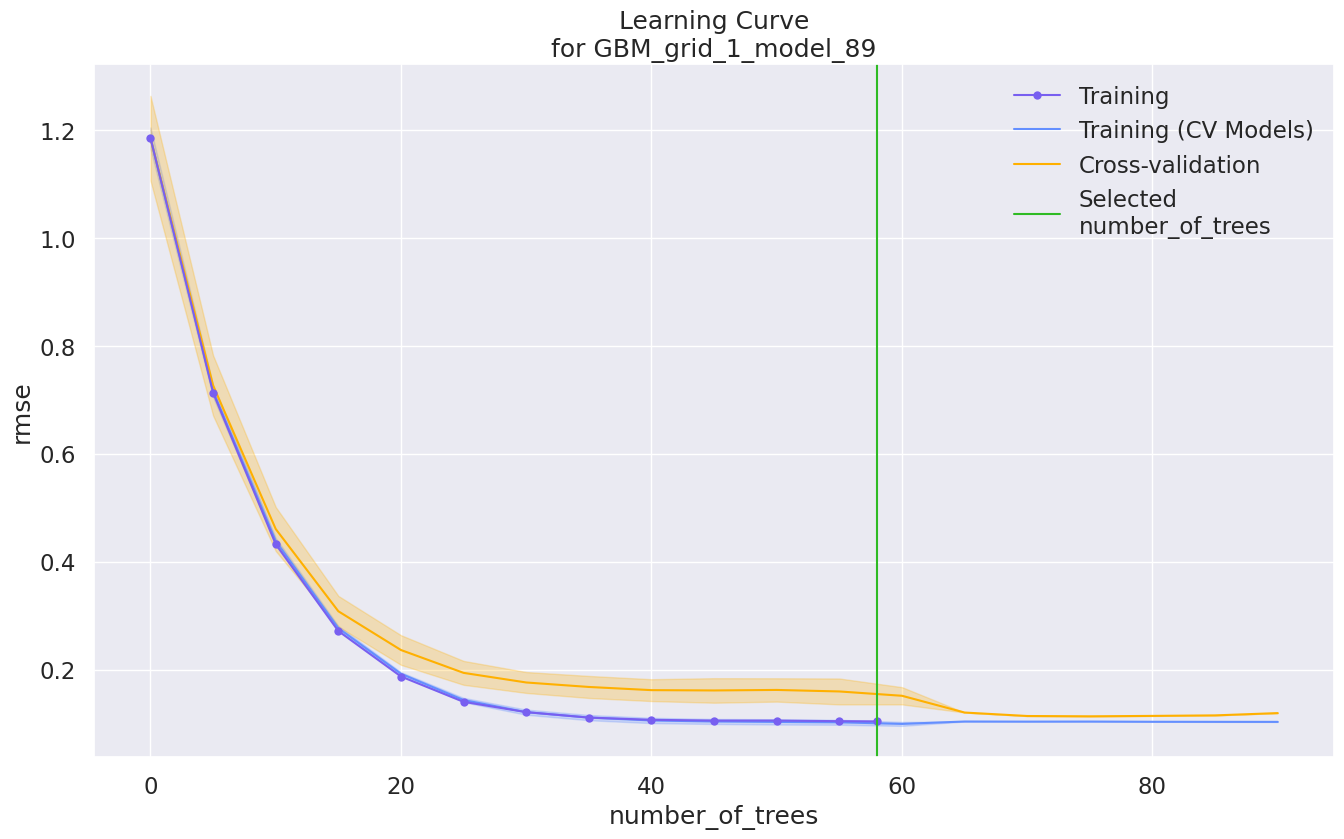

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

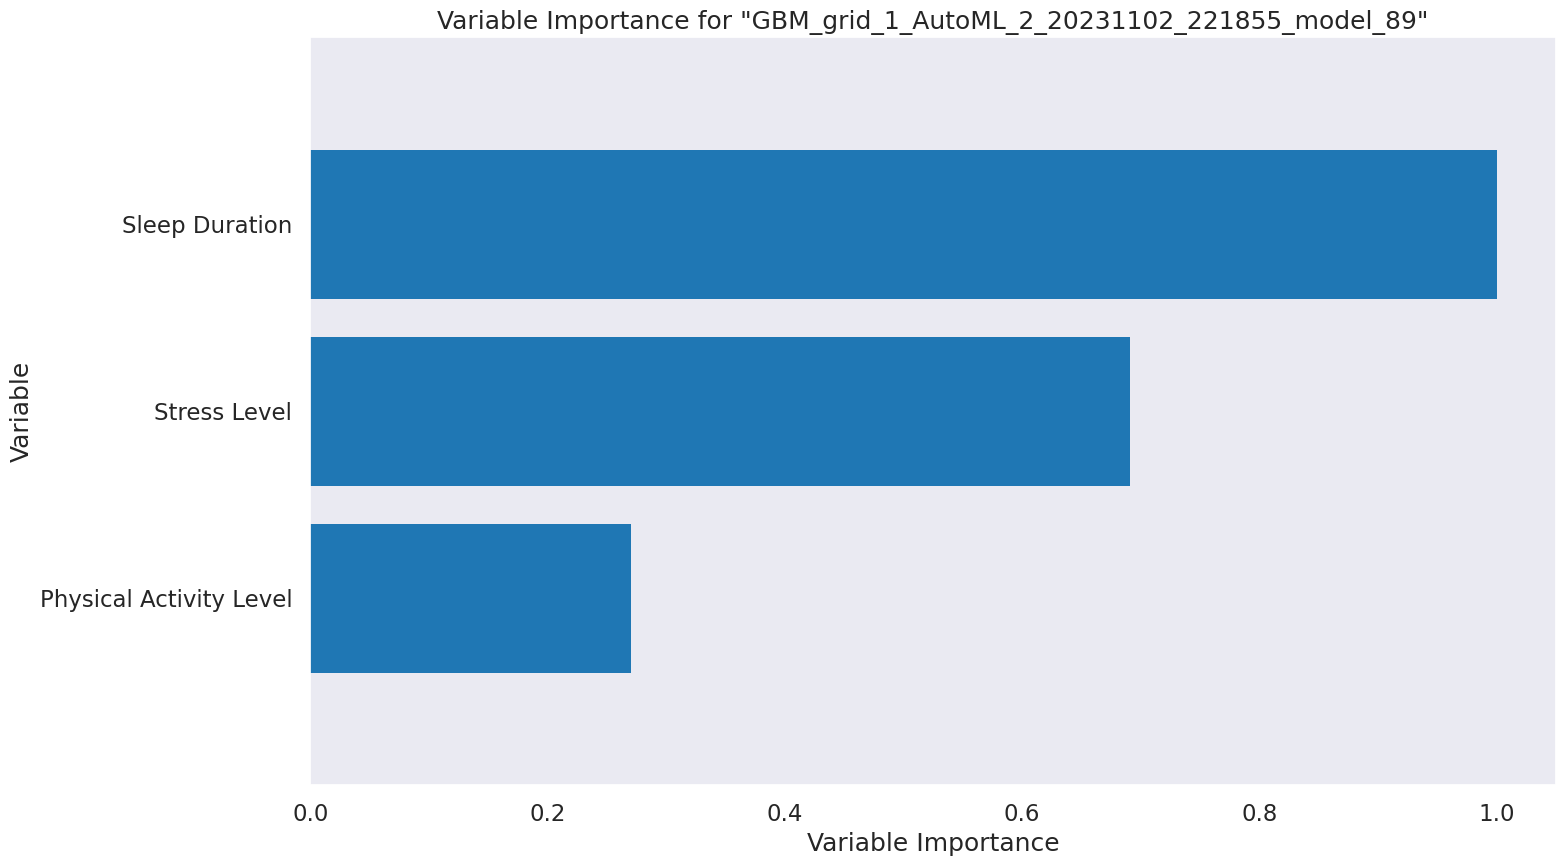

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

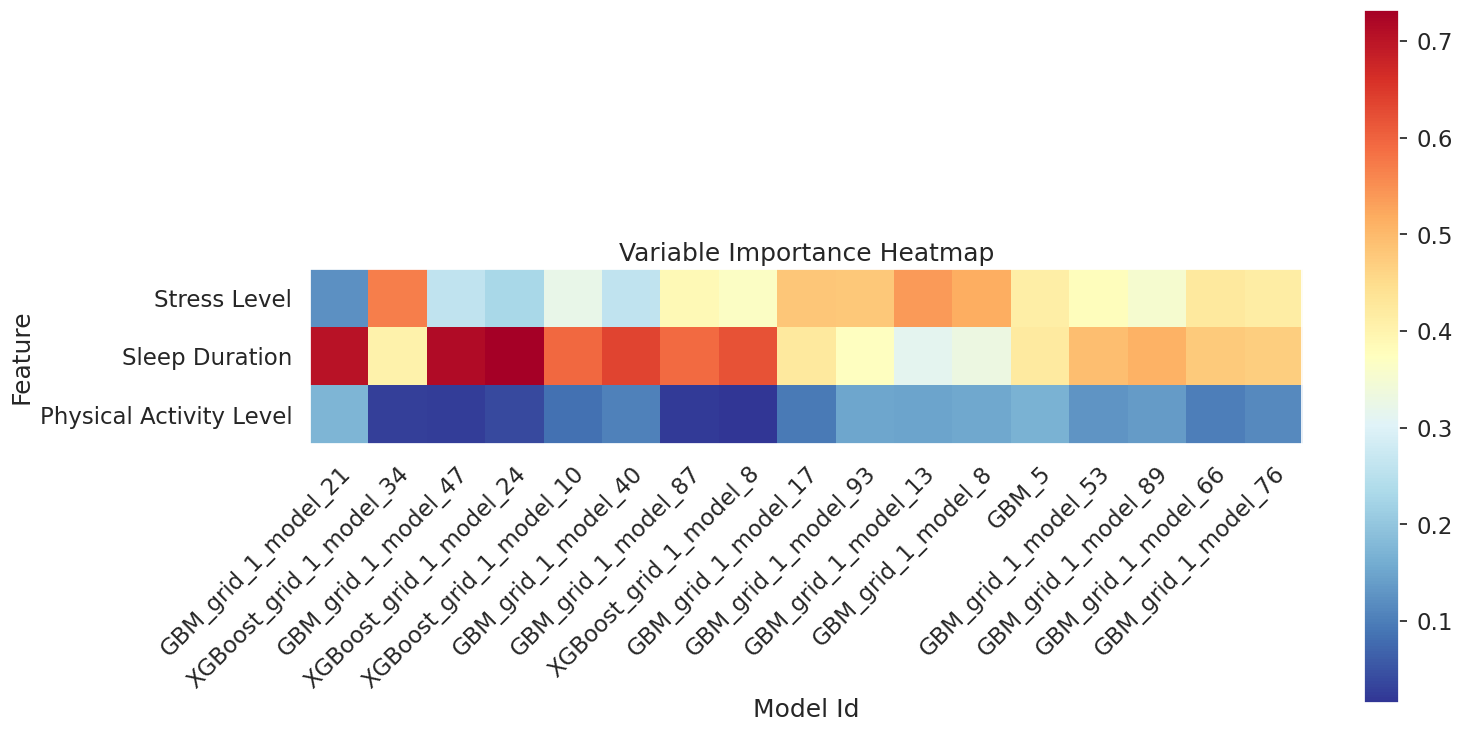

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

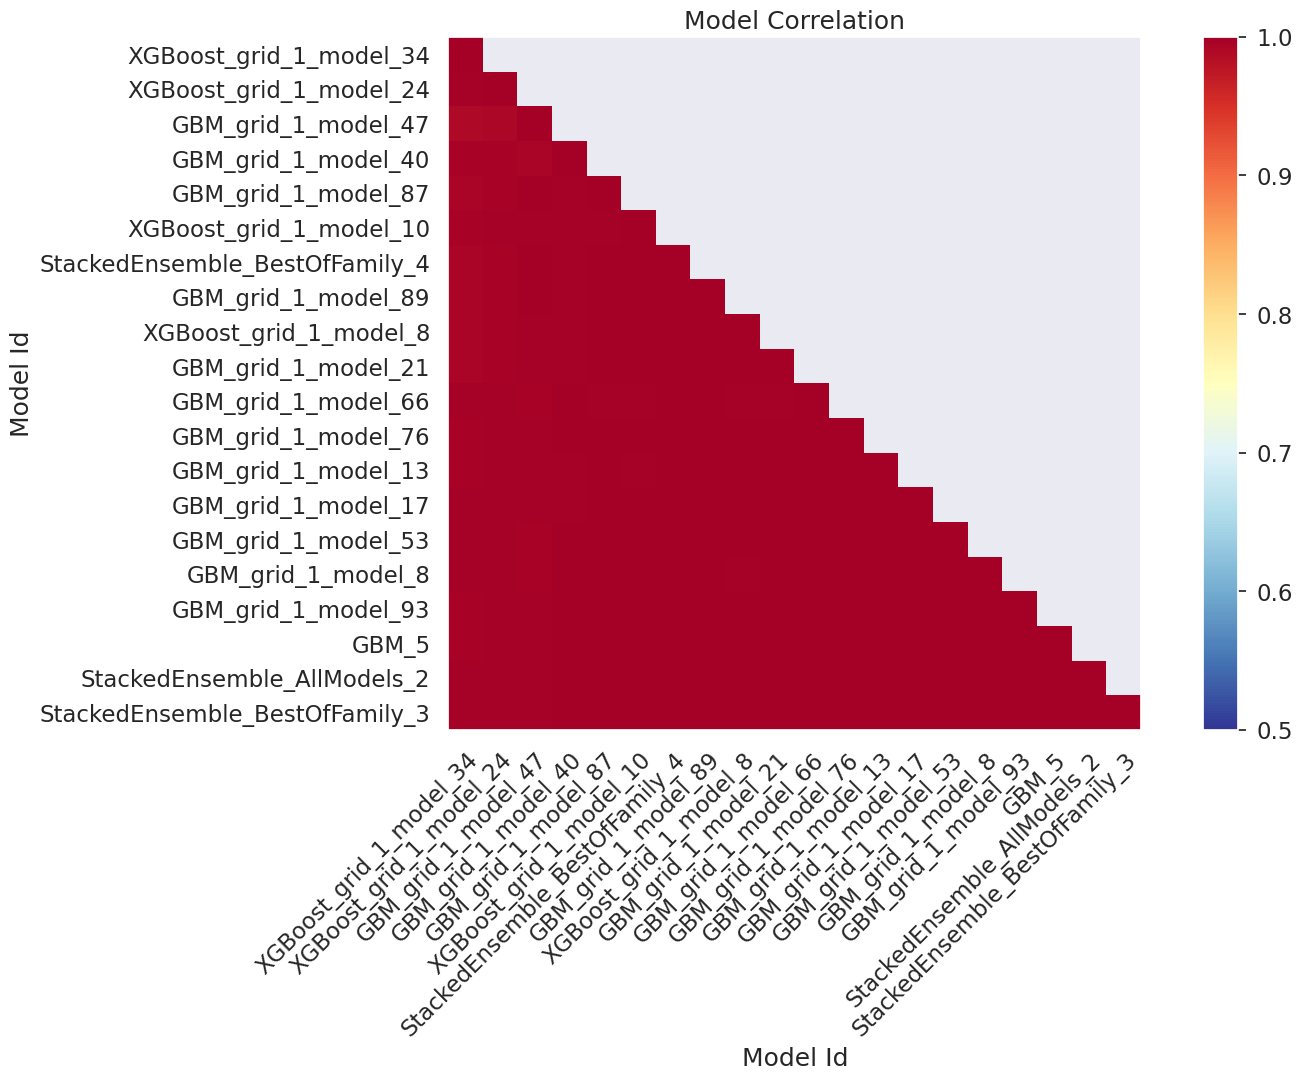

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

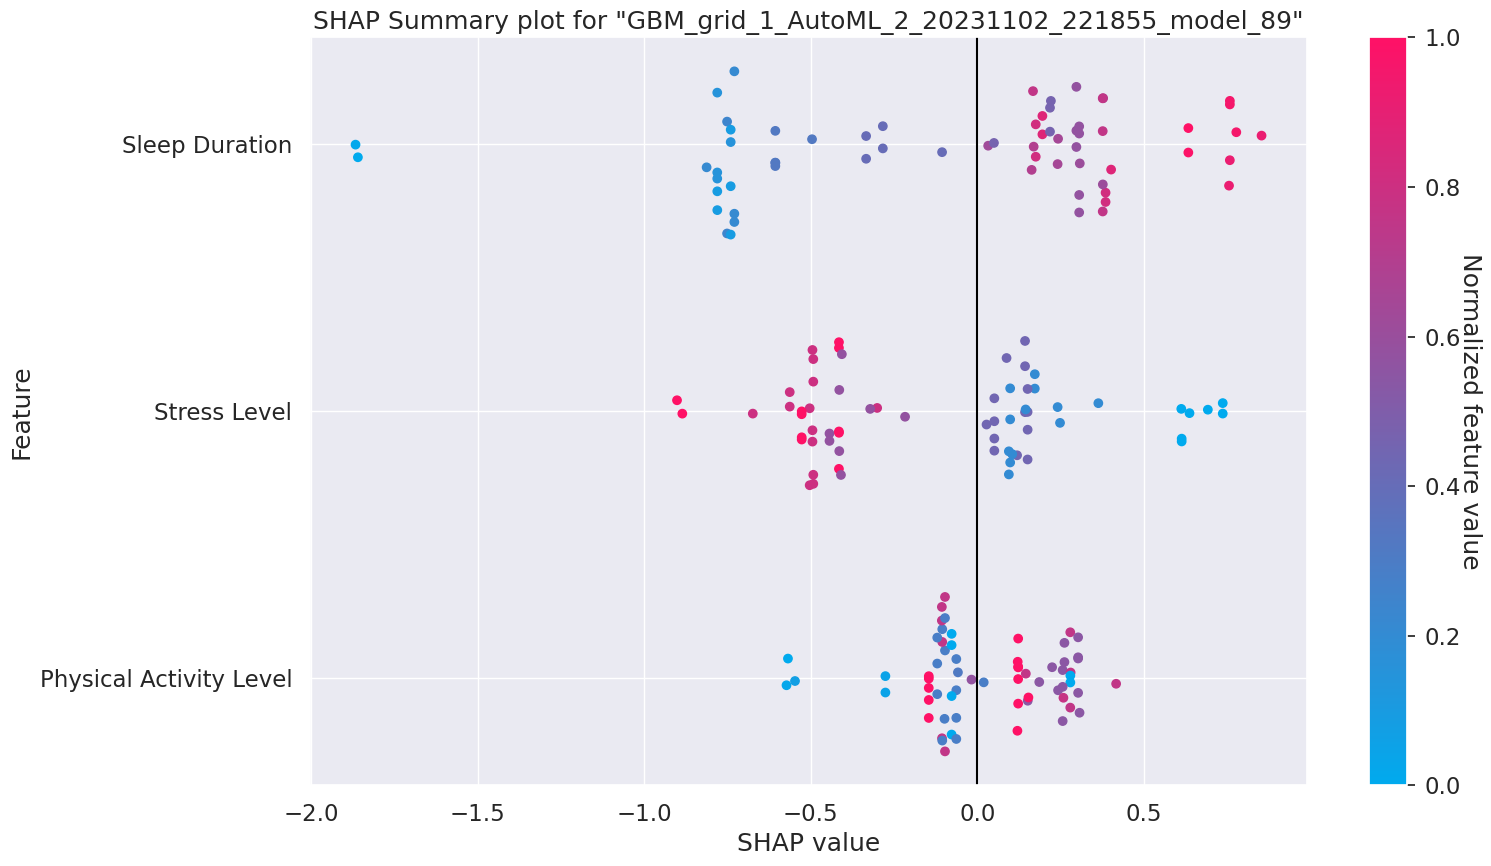

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

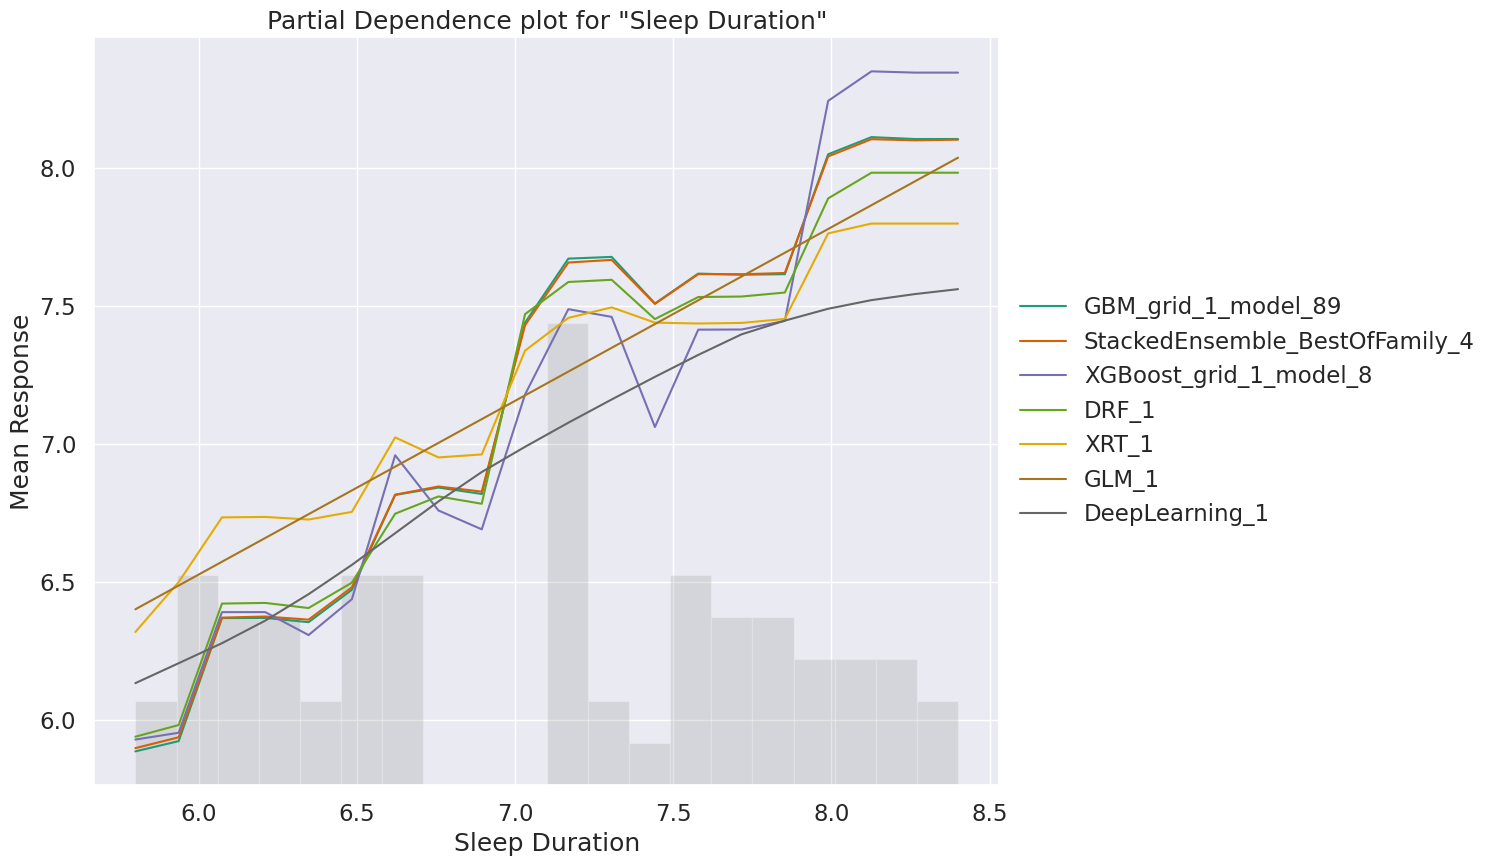

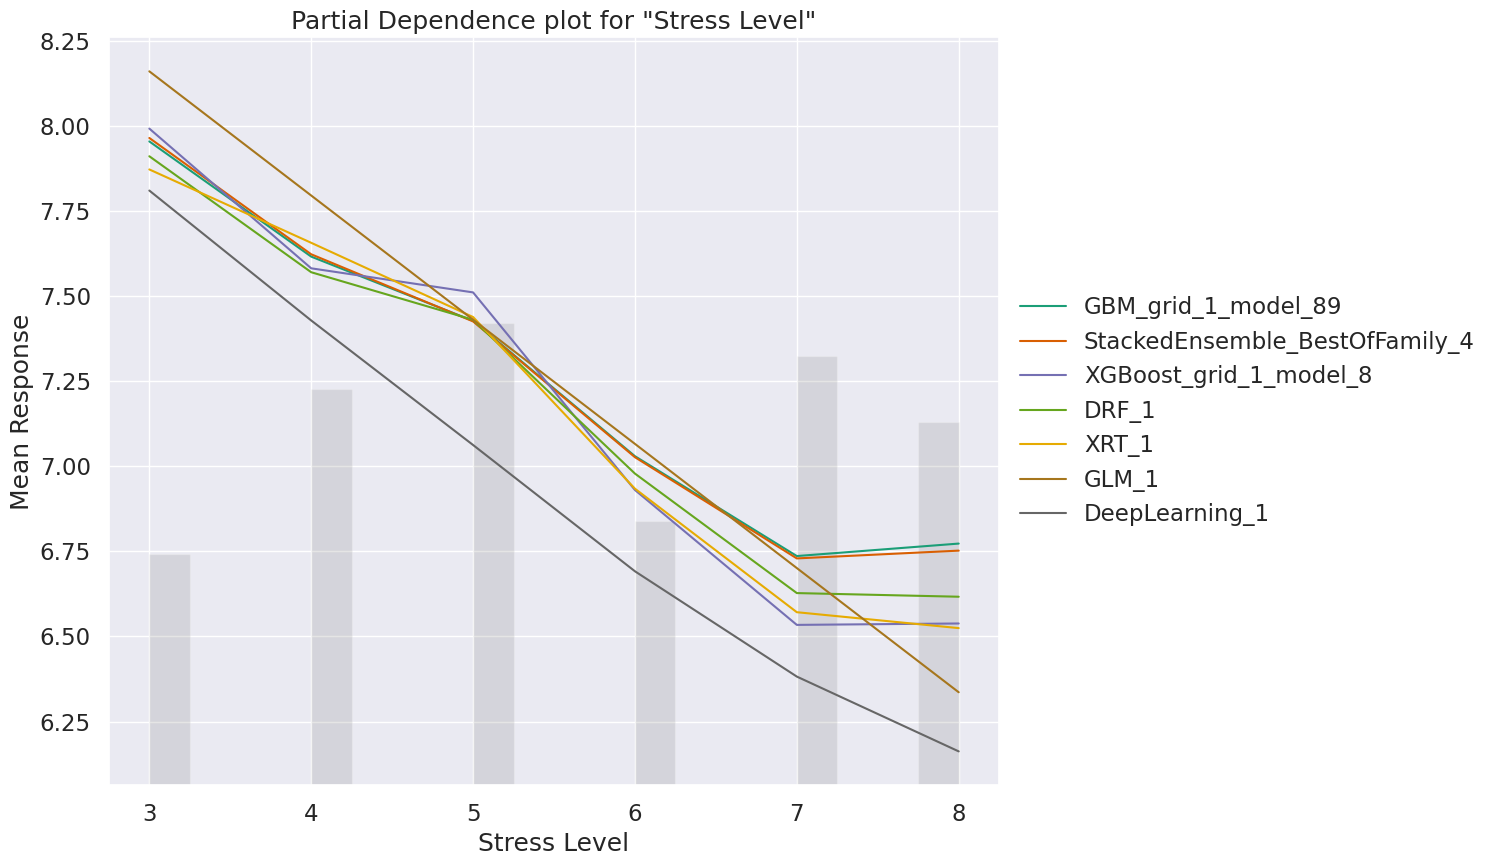

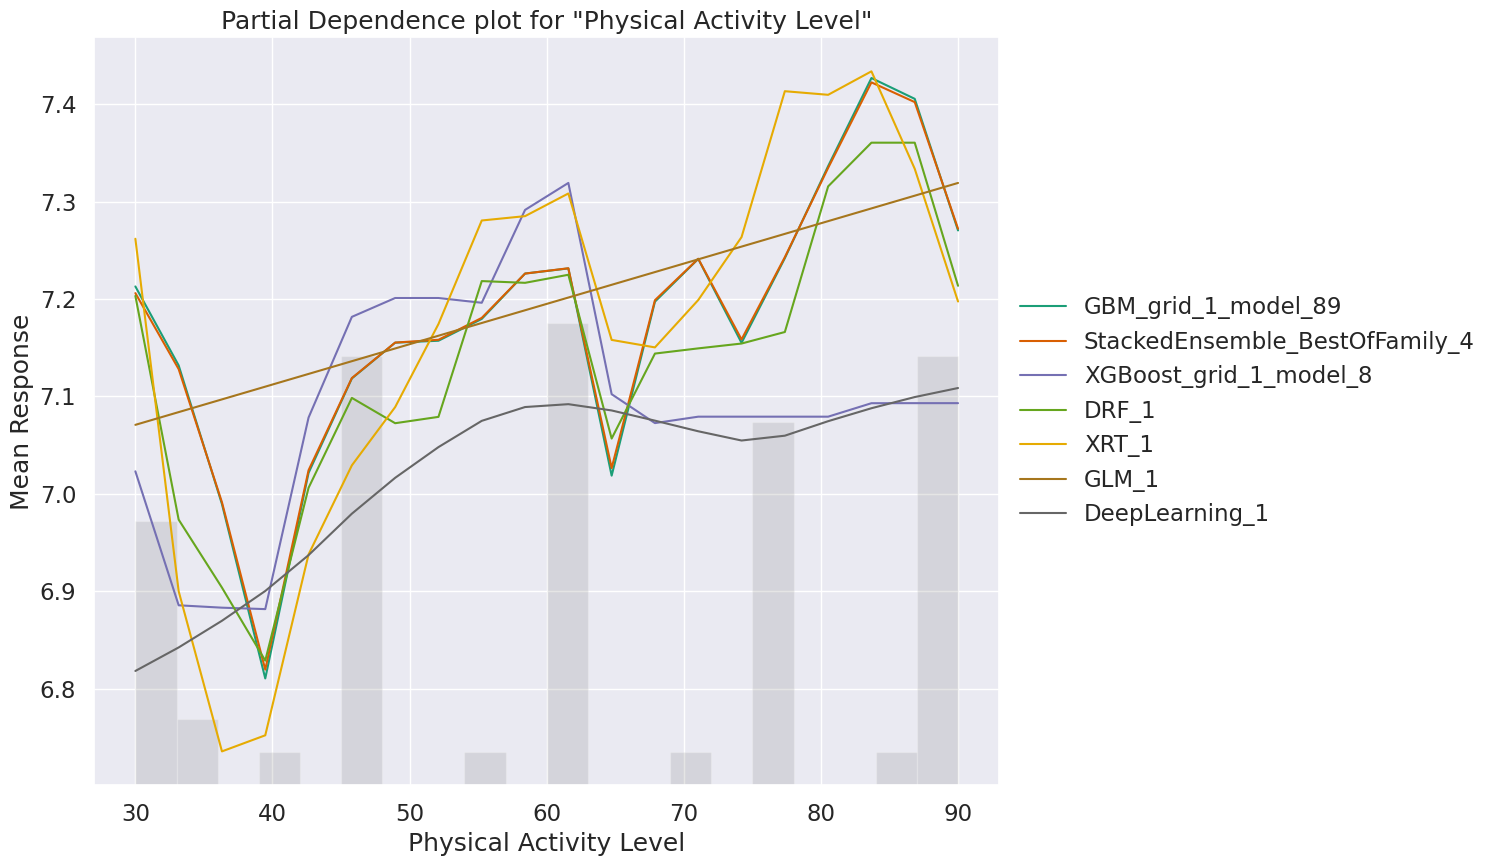

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

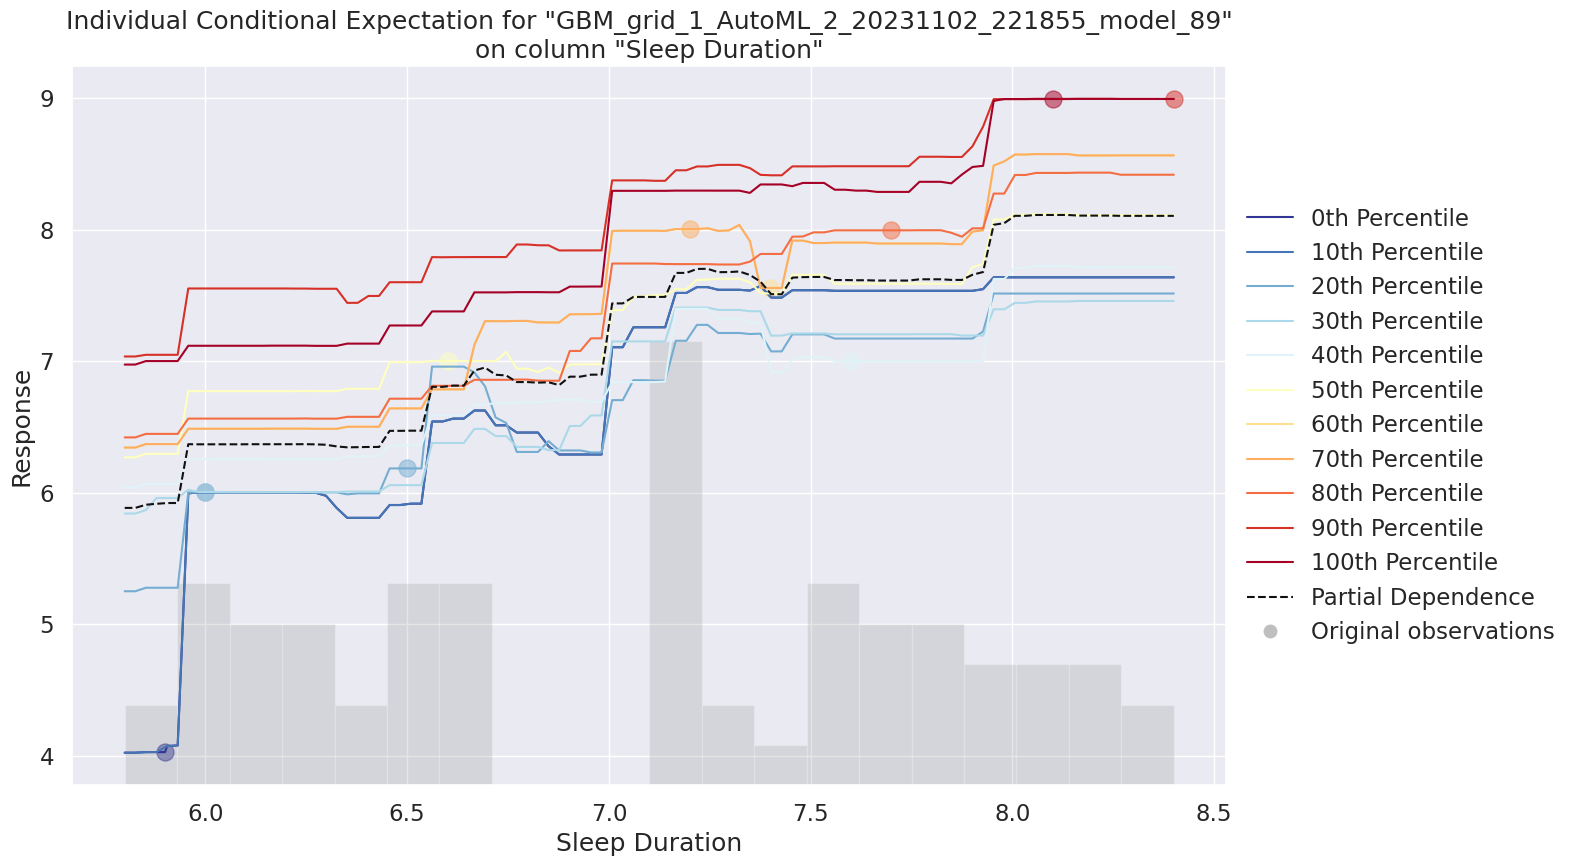

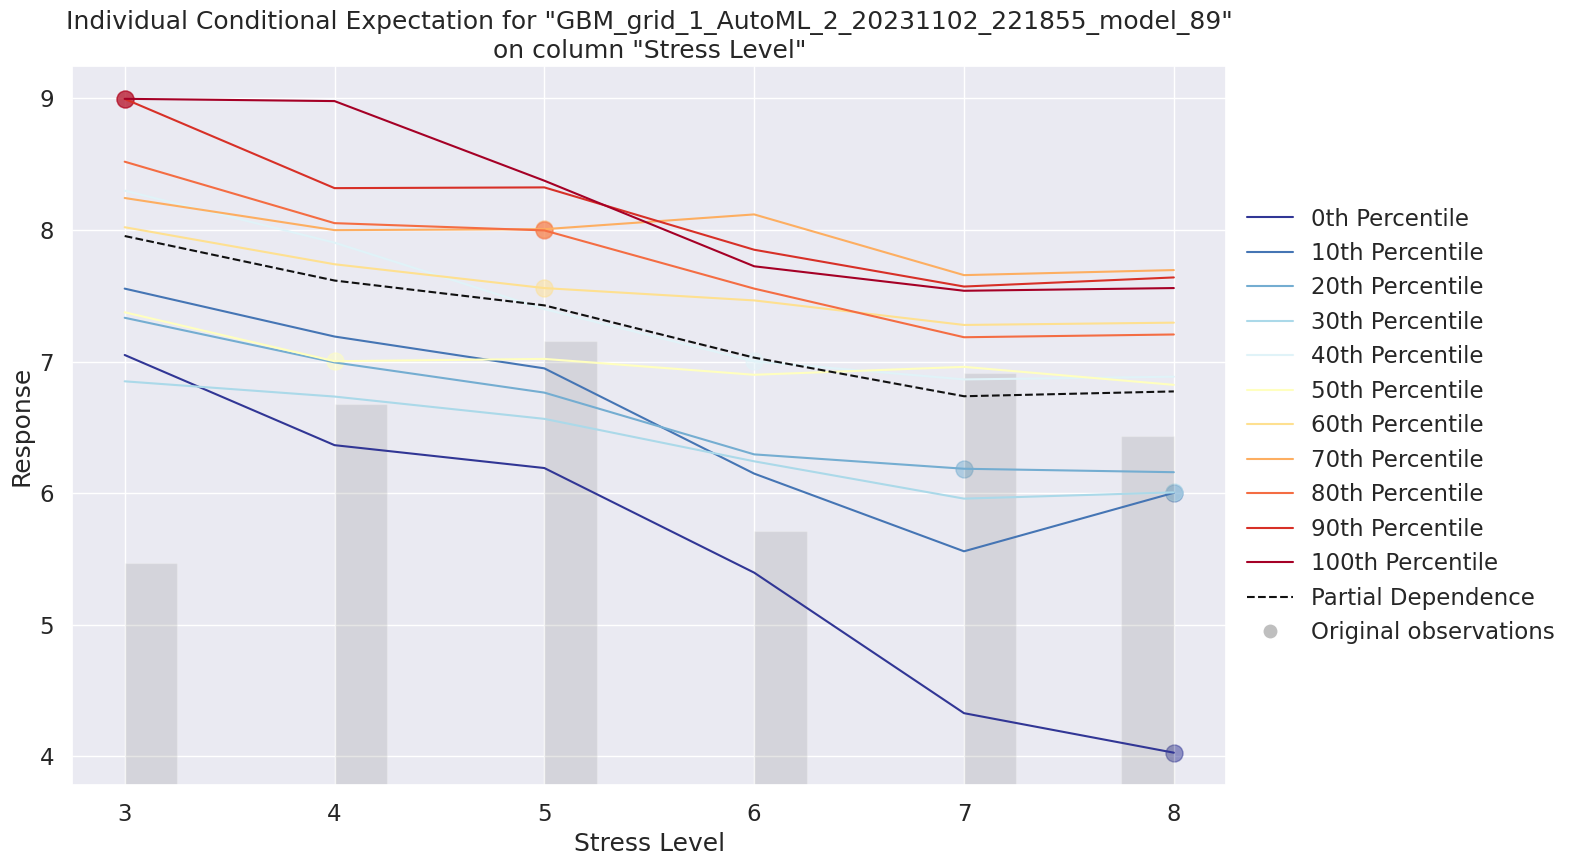

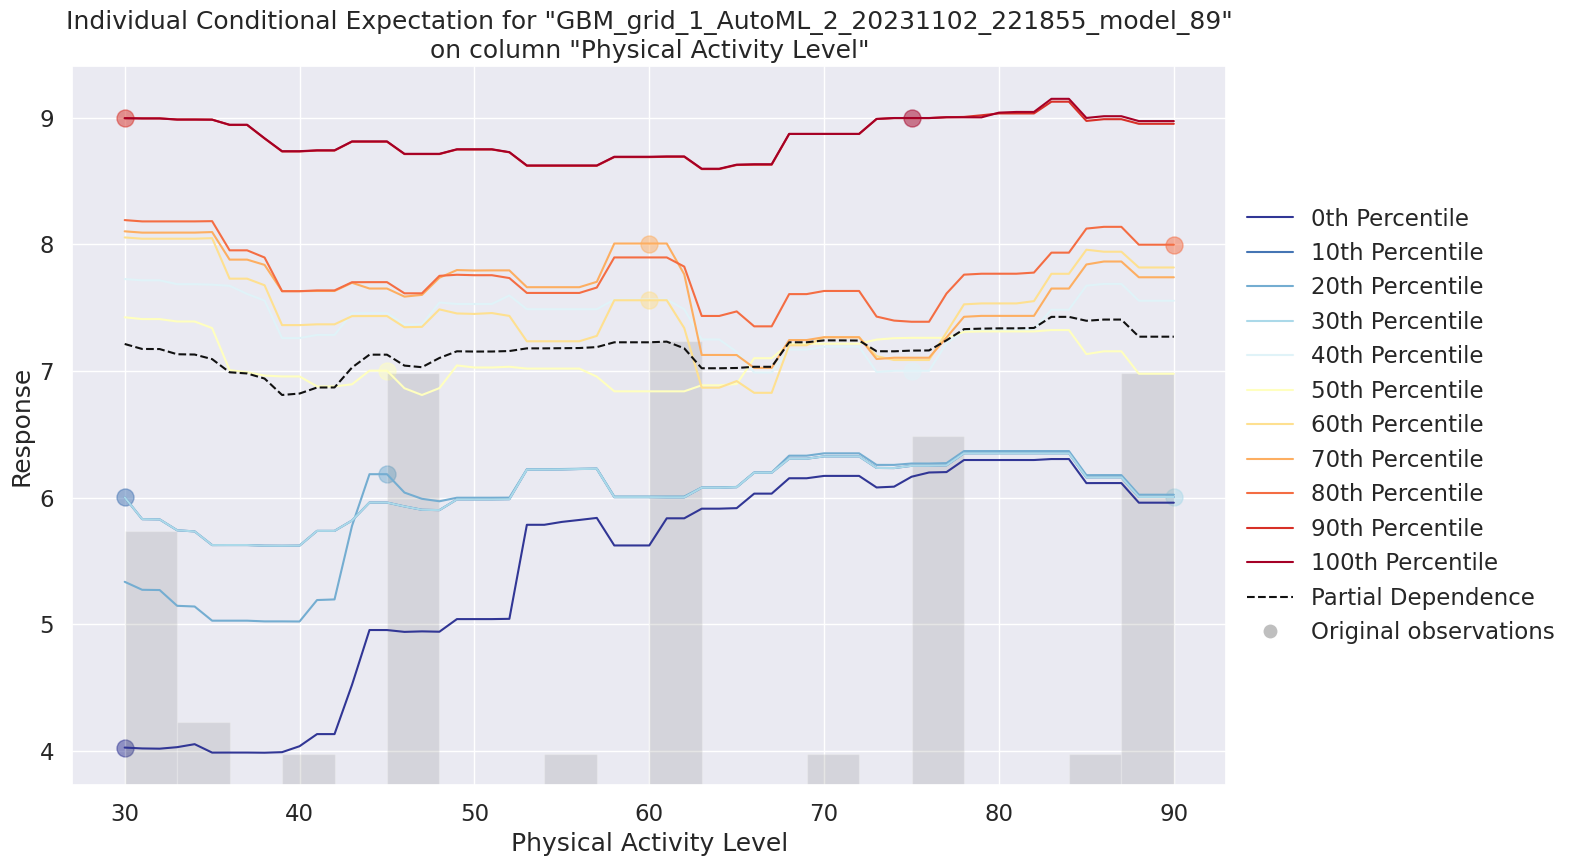

In [ ]:
exa = aml1.explain(df1_test)

### **Interpreting Best Model from AutoML**

### **Residual Analysis**

In this instance, the use of integer answer values rather than real numbers results in the appearance of multicolored lines in the residual plot. Furthermore, it is evident from the graph that the residuals have a normal distribution. The multicolored lines and the lack of a cylindrical pattern in the residual plot serve as visual clues that suggest the absence of heteroscedasticity.

### **ICE Plot Analysis**

This figure shows an Individual Conditional Expectation (ICE) plot for the model "GBM_grid_1_AutoML2_20231102_221855_model_89" with a focus on the feature "Sleep Duration".

The "Sleep Duration" feature is represented on the x-axis.The colorful lines show the expected results for individual observations at different percentiles . Every line shows how, for a given observation, the expected reaction varies with different "Sleep Duration" values. The response, or expected result, is shown on the y-axis.The model's partial dependence is represented by the dashed line, which displays the typical influence of "Sleep Duration" on the anticipated result. In the data, the circle marks stand in for original observations. Their location on the y-axis represents the real reaction, and their position on the x-axis represents the "Sleep Duration" value. Histogram Overlay: The distribution of the "Sleep Duration" values is shown by the light gray histogram in the background. Peaks represent regions where there is a greater density of data points. The expected response is largely stable at higher percentiles over the range of "Sleep Duration" values.
As "Sleep Duration" rises, lower percentiles exhibit a progressive increase in reaction.



### **SHAP Analysis**

The SHAP summary diagram allows us to deduce several conclusions.
The features are ordered from most important to least important. The model's most significant predictor is clearly sleep duration, which is followed by stress level and physical activity level.
Higher perimeter_worst values appear to systematically raise forecasts.








### **Variable Importance Analysis using H2O Gradient Boosting Machine**
The Gradient Boosting Machine model is used to visualize the importance of different characteristics in predicting sleep quality.
The blue bars' lengths, longer bars denoting greater importance, show the relative value of each variable. Sleep Duration: When it comes to result prediction, this variable is the most significant. It is the most prominent feature and is of the utmost significance. The second most significant factor, stress level is marginally less significant than sleep duration.




AutoML models like the one created by H2O can be quite complex, often combining multiple machine learning algorithms and models into an ensemble. The explain method likely generates insights into how the model arrived at its predictions on the test dataset. This can include information about the importance of different features, the contribution of individual models within the ensemble, and other factors affecting the final predictions.



# Hyperparameter Tuning

Hyperparameter tuning is a crucial step in the machine learning model development process. It involves the optimization of hyperparameters, which are parameters that are not learned from the data but are set prior to the training process.

In [ ]:
# Assuming 'Gender' is a categorical variable
dfpd1_encoded = pd.get_dummies(dfpd, columns=['Gender'], drop_first=True)

# Then, split the data into features and target variable
X = dfpd1_encoded.drop(['Quality_of_Sleep'], axis=1)
y = dfpd1_encoded['Quality_of_Sleep']

In [ ]:
s = dfpd1['Quality_of_Sleep']

t = dfpd1.drop(['Age','Gender','Occupation','BMI_Category','Blood_Pressure','Sleep_Disorder','Quality_of_Sleep'], axis = 1)

In [ ]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV

In [ ]:

t_train, t_test, s_train, s_test = train_test_split (t, s, random_state = 101, test_size = 0.2)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor

mode = RandomForestRegressor()

param_vals = {'max_depth': [200, 500, 800, 1100], 'n_estimators': [100,200, 300, 400], 'min_samples_split' : [2,3,5]

}

random_rf = RandomizedSearchCV(estimator=mode, param_distributions=param_vals,

n_iter=10, scoring='accuracy', cv=5,

refit=True, n_jobs=-1)

#Training and prediction



random_rf.fit(t_train, s_train)

preds = random_rf.best_estimator_.predict(t_test)


In [ ]:
random_rf.best_params_

{'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 800}

# **Conclusion**


The analysis confirms the statistical significance of the relationships in the dataset, with most variables having p-values below 0.05. While some model assumptions are met, homoscedasticity is not fully satisfied. Initial multicollinearity issues, particularly between Sleep Duration and Quality of Sleep, were resolved by dropping specific columns. Most predictor variables were found to be independent, except for Sleep Duration and Quality of Sleep, which exhibited a correlation. The two most influential predictors for Quality of Sleep were Sleep Duration and Stress Level, although they were excluded due to high VIF and p-values. The model is considered suitable, with strong performance metrics and the effective application of Ridge Regularization. All independent variables, except 'BMI Category,' were deemed significant with p-values less than 0.05. Further testing and validation on new data are advisable to ensure the model's robustness and accuracy.



## **Answer the following questions:**


**1) Is the relationship significant?**

A relationship is said to be statistically significant when the p value for the variables is less than 0.05.P value is probability of obtaining a result at least as extreme as the current one, assuming null hypothesis is true. A small p value depicts that there is very little similarity between the two groups and hence null hypothesis can be ignored. P-value was calculated by two ways for this model. From the OLS method it was observed that values for ‘BMI Category’ was greater than 0.05. So, it can be concluded that other that p-value for all the variables of dataset is less than 0.05. Hence for the chosen dataset it can be concluded that the relationship is significant.


**2)Are any model assumptions violated?**

1.Linear relationship- The graph for dependent and independent variable needs to be linear by keeping other variables constant. When target variable is plotted against all other independent variables, linear relation is observed for few of them. Hence this assumption is not violated.

2.Homoscedasticity which means normality of the error distribution - The plot for residuals should be normally distributed i.e., it should form a bell-curve shape. For this model it is not achieved.

3.No or little multicollinearity-This can be determined by correlation matrix. For this model some of the assumptions are violated. Multicollinearity exists between variables Sleep Duration and Heart Rate.

4.No autocorrelation can be determined with Durbin-Watson test. Values between 1.5 to 2.5 signifies no autocorrelation. For this model the value is 1.6, therefore this assumption is not violated.



**3)Is there any multicollinearity in the model?**

When one independent variable is related to another independent variable that is its highly correlated then multicollinearity exists in the model. It’s an issue as it undermines the statistical significance of an independent variable. Multicollinearity can be determined by computing correlation matrix or calculating VIF value of all variables. In correlation matrix a coefficient closer to +1 or -1 tells us that those two variables are highly correlated. For VIF values a value above 10 tells us that multicollinearity exists. In this model some variables had VIF value greater than 10 and p value was greater than 0.05. By dropping those columns and rechecking the values expected output was achieved. Currently high correlation exists between Sleep Duration and Quality of Sleep.


**4)In the multivariate models are predictor variables independent of all the other predictor variables?**

Variables are said to be independent when there is no relation between them. To check this relation, correlation matrix can be used, or it can be observed from graphs too whether there is any pattern followed or not. When correlation matrix is computed for the model, it can be observed that Sleep Duration and Quality of SLeep are correlated to each other. Other than those other predictors are independent from each other.


**5)In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**

From the variable importance plot, the most to least important variables are displayed. For my model Sleep Duration, Stress Level are top 2 most important variables to determine Quality of Sleep. VIF and p-values for Sleep Duration and Stress Level was high than the ideal values. So those variables were excluded from the model.


**6)Does the model make sense?**

 For a model to make sense it should follow all the assumptions and have p value, VIF between their respective ranges. RMSE should be as low as possible considering the minimum and maximum values of the target variable. Other than that, R2 too is 0.9 which is considered good in terms of accuracy. So overall the model makes sense. To increase the accuracy, some additional variables can be dropped depending on their importance. Furthermore, outliers can be removed or boosting, or ensemble model can be used.


**7)Does regularization help?**

Regularization is a technique used for tuning the random noise function by adding an additional term to noise function. This additional term controls the excessively fluctuating function such that the coefficients don’t take extreme values and the prediction of target value for test data is not highly affected. The main use of Regularization is to minimize the validation loss and try to improve the accuracy of the model. For this model Ridge Regularization was used on training data. It was observed that Root Mean Square Error (RMSE) and R2 was calculated twice, once when regularization was not applied and once when regularization was applied. The values were different in both the cases. Hence it can be concluded that for this model regularization does help.


**8)Which independent variables are significant?**

Variables are significant when p-value is less than 0.05. For this model except for ‘BMI Category’ all other variables have p-value less than 0.05. So, it can be said that all variables are significant.


**9)Which hyperparameters are important?**

To find best set a hyperparameter and combinations of interacting hyperparameters for a given dataset hyperparameters tuning is used. It objectively searches different values for model hyperparameters and chooses a subset that results in a model that achieves the best performance on a given dataset. For this model tuning is performed using RandomForestRegressor. The best hyperparameters for this model are:- 'max_depth': 800, 'min_samples_split': 2 and 'n_estimators': 100


**10)Coding professionalism?**

We imported the necessary libraries and utilized H2O instead of Pandas for data manipulation. We employed a heatmap to assess the correlations among variables, aiding in the identification of independent and predictor variables. Following this, after initializing H2O, we constructed both GLM and GBM models and provided comprehensive explanations for each. We performed these modeling steps twice to evaluate the impact of regularization. The execution of these analyses demonstrates a high level of coding proficiency and attention to detail.

## **Citations**

1.In this notebook following techniques are taken into consideration

Owner - AI Skunkworks Link - https://github.com/aiskunks/Skunks_Skool

Author name - Prof Nik Bear Brown Link - https://github.com/nikbearbrown/

2.stackoverflow Link - https://stackoverflow.com

3.Sleep Data Analysis - https://www.mastersindatascience.org/resources/sleep-data-to-improve-rest/

4.Sleep_health_and_lifestyle_dataset - https://github.com/Akanksha-Nakati/Data-Science-Engineering-Methods/blob/main/Sleep_health_and_lifestyle_dataset.csv

5.Code Reference - https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynb




# **License**

## Copyright 2023 Akanksha Nakati

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.